# Urinalysis

https://www.kaggle.com/datasets/avarice02/urinalysis-test-results


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import sklearn
import warnings
import imblearn
import sklearn.metrics as metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif, SelectPercentile 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import mutual_info_classif
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import chi2
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold
from collections import Counter
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV


warnings.filterwarnings('ignore')

In [2]:
# load dataset
data = pd.read_csv('urinalysis_tests.csv')

In [3]:
data.head()

,Unnamed: 0,Age,Gender,Color,Transparency,Glucose,Protein,pH,Specific Gravity,WBC,RBC,Epithelial Cells,Mucous Threads,Amorphous Urates,Bacteria,Diagnosis
0,0,76.0,FEMALE,LIGHT YELLOW,CLEAR,NEGATIVE,NEGATIVE,5.0,1.010,1-3,0-2,OCCASIONAL,RARE,NONE SEEN,OCCASIONAL,NEGATIVE
1,1,9.0,MALE,DARK YELLOW,SLIGHTLY HAZY,NEGATIVE,1+,5.0,1.030,1-3,0-2,RARE,FEW,FEW,MODERATE,NEGATIVE
2,2,12.0,MALE,LIGHT YELLOW,SLIGHTLY HAZY,NEGATIVE,TRACE,5.0,1.030,0-3,0-2,RARE,FEW,MODERATE,RARE,NEGATIVE
3,3,77.0,MALE,BROWN,CLOUDY,NEGATIVE,1+,6.0,1.020,5-8,LOADED,RARE,RARE,NONE SEEN,FEW,NEGATIVE
4,4,29.0,FEMALE,YELLOW,HAZY,NEGATIVE,TRACE,6.0,1.025,1-4,0-2,RARE,RARE,NONE SEEN,FEW,NEGATIVE


In [4]:
data = data.drop('Unnamed: 0', axis = 1)

In [5]:
data.head()

,Age,Gender,Color,Transparency,Glucose,Protein,pH,Specific Gravity,WBC,RBC,Epithelial Cells,Mucous Threads,Amorphous Urates,Bacteria,Diagnosis
0,76.0,FEMALE,LIGHT YELLOW,CLEAR,NEGATIVE,NEGATIVE,5.0,1.010,1-3,0-2,OCCASIONAL,RARE,NONE SEEN,OCCASIONAL,NEGATIVE
1,9.0,MALE,DARK YELLOW,SLIGHTLY HAZY,NEGATIVE,1+,5.0,1.030,1-3,0-2,RARE,FEW,FEW,MODERATE,NEGATIVE
2,12.0,MALE,LIGHT YELLOW,SLIGHTLY HAZY,NEGATIVE,TRACE,5.0,1.030,0-3,0-2,RARE,FEW,MODERATE,RARE,NEGATIVE
3,77.0,MALE,BROWN,CLOUDY,NEGATIVE,1+,6.0,1.020,5-8,LOADED,RARE,RARE,NONE SEEN,FEW,NEGATIVE
4,29.0,FEMALE,YELLOW,HAZY,NEGATIVE,TRACE,6.0,1.025,1-4,0-2,RARE,RARE,NONE SEEN,FEW,NEGATIVE


## EDA

In [6]:
# shape
data.shape

(1436, 15)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               1436 non-null   float64
 1   Gender            1436 non-null   object 
 2   Color             1435 non-null   object 
 3   Transparency      1436 non-null   object 
 4   Glucose           1436 non-null   object 
 5   Protein           1436 non-null   object 
 6   pH                1436 non-null   float64
 7   Specific Gravity  1436 non-null   float64
 8   WBC               1436 non-null   object 
 9   RBC               1436 non-null   object 
 10  Epithelial Cells  1436 non-null   object 
 11  Mucous Threads    1436 non-null   object 
 12  Amorphous Urates  1436 non-null   object 
 13  Bacteria          1436 non-null   object 
 14  Diagnosis         1436 non-null   object 
dtypes: float64(3), object(12)
memory usage: 168.4+ KB


In [8]:
# checking for missing values
data.isnull().sum()

Age                 0
Gender              0
Color               1
Transparency        0
Glucose             0
Protein             0
pH                  0
Specific Gravity    0
WBC                 0
RBC                 0
Epithelial Cells    0
Mucous Threads      0
Amorphous Urates    0
Bacteria            0
Diagnosis           0
dtype: int64

In [9]:
# identifying row with null value 
# https://saturncloud.io/blog/python-pandas-selecting-rows-whose-column-value-is-null-none-nan/#:~:text=The%20simplest%20way%20to%20select,dataframe%20is%20null%20or%20not.
null_mask = data.isnull().any(axis=1)
null_rows = data[null_mask]

print(null_rows)

       Age  Gender Color Transparency   Glucose Protein   pH  \
1353  18.0  FEMALE   NaN        CLEAR  NEGATIVE   TRACE  6.0   

      Specific Gravity  WBC  RBC Epithelial Cells Mucous Threads  \
1353              1.02  1-2  0-2             RARE       MODERATE   

     Amorphous Urates Bacteria Diagnosis  
1353        NONE SEEN     RARE  NEGATIVE  


In [10]:
# As the row with the null value is a Negative diagnosis (and there is so many of them), this row will be dropped
df = data.dropna()
df.shape

(1435, 15)

In [11]:
# counting the number of negative and postive diagnosis  
y = df['Diagnosis'].value_counts()
print(y)

NEGATIVE    1354
POSITIVE      81
Name: Diagnosis, dtype: int64


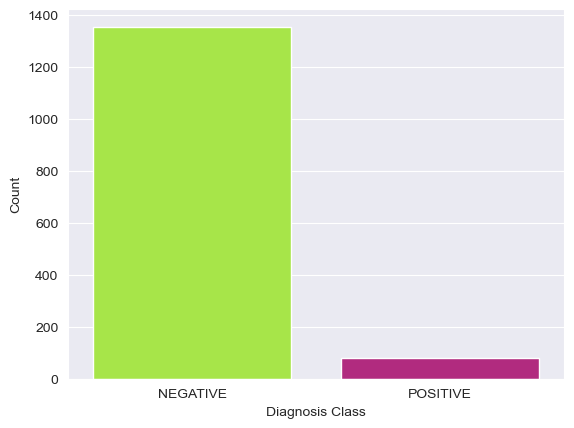

In [12]:
# Visulaising the imbalance 

sns.set_style("darkgrid") 
sns.countplot(data=df, x='Diagnosis', palette={'NEGATIVE': 'greenyellow', 'POSITIVE': 'mediumvioletred'})
plt.xlabel('Diagnosis Class')
plt.ylabel('Count')
plt.savefig('count_plot.png', bbox_inches='tight')
plt.show()


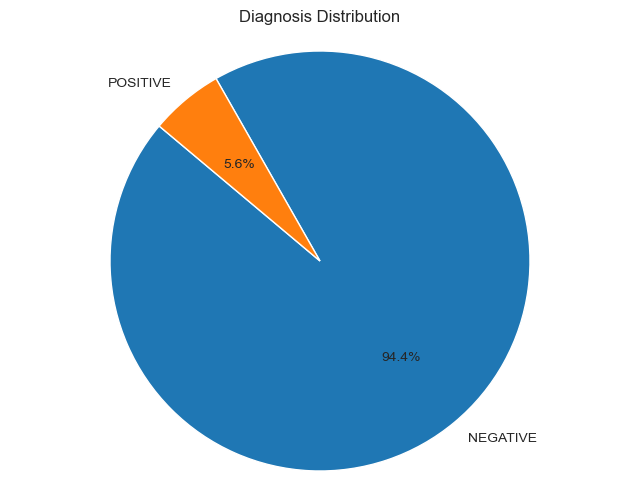

In [13]:
diagnosis_counts = df['Diagnosis'].value_counts()

# Plotting the pie chart
plt.figure(figsize=(8, 6))
plt.pie(diagnosis_counts, labels=diagnosis_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Diagnosis Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

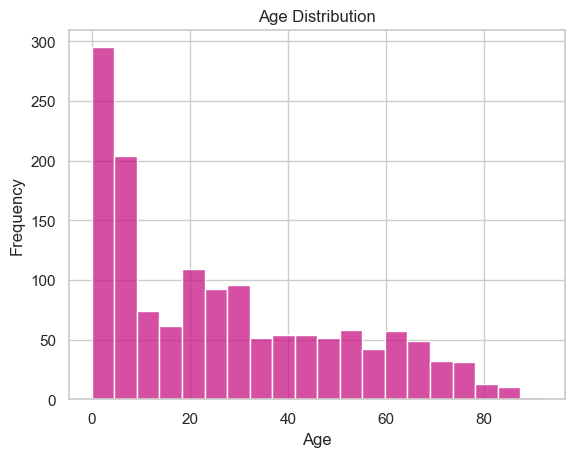

In [14]:
# Visualising age distrubution 
sns.set(style="whitegrid")
plt.figure()
sns.histplot(data=df, x='Age', bins=20, kde=False, color='mediumvioletred' )
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

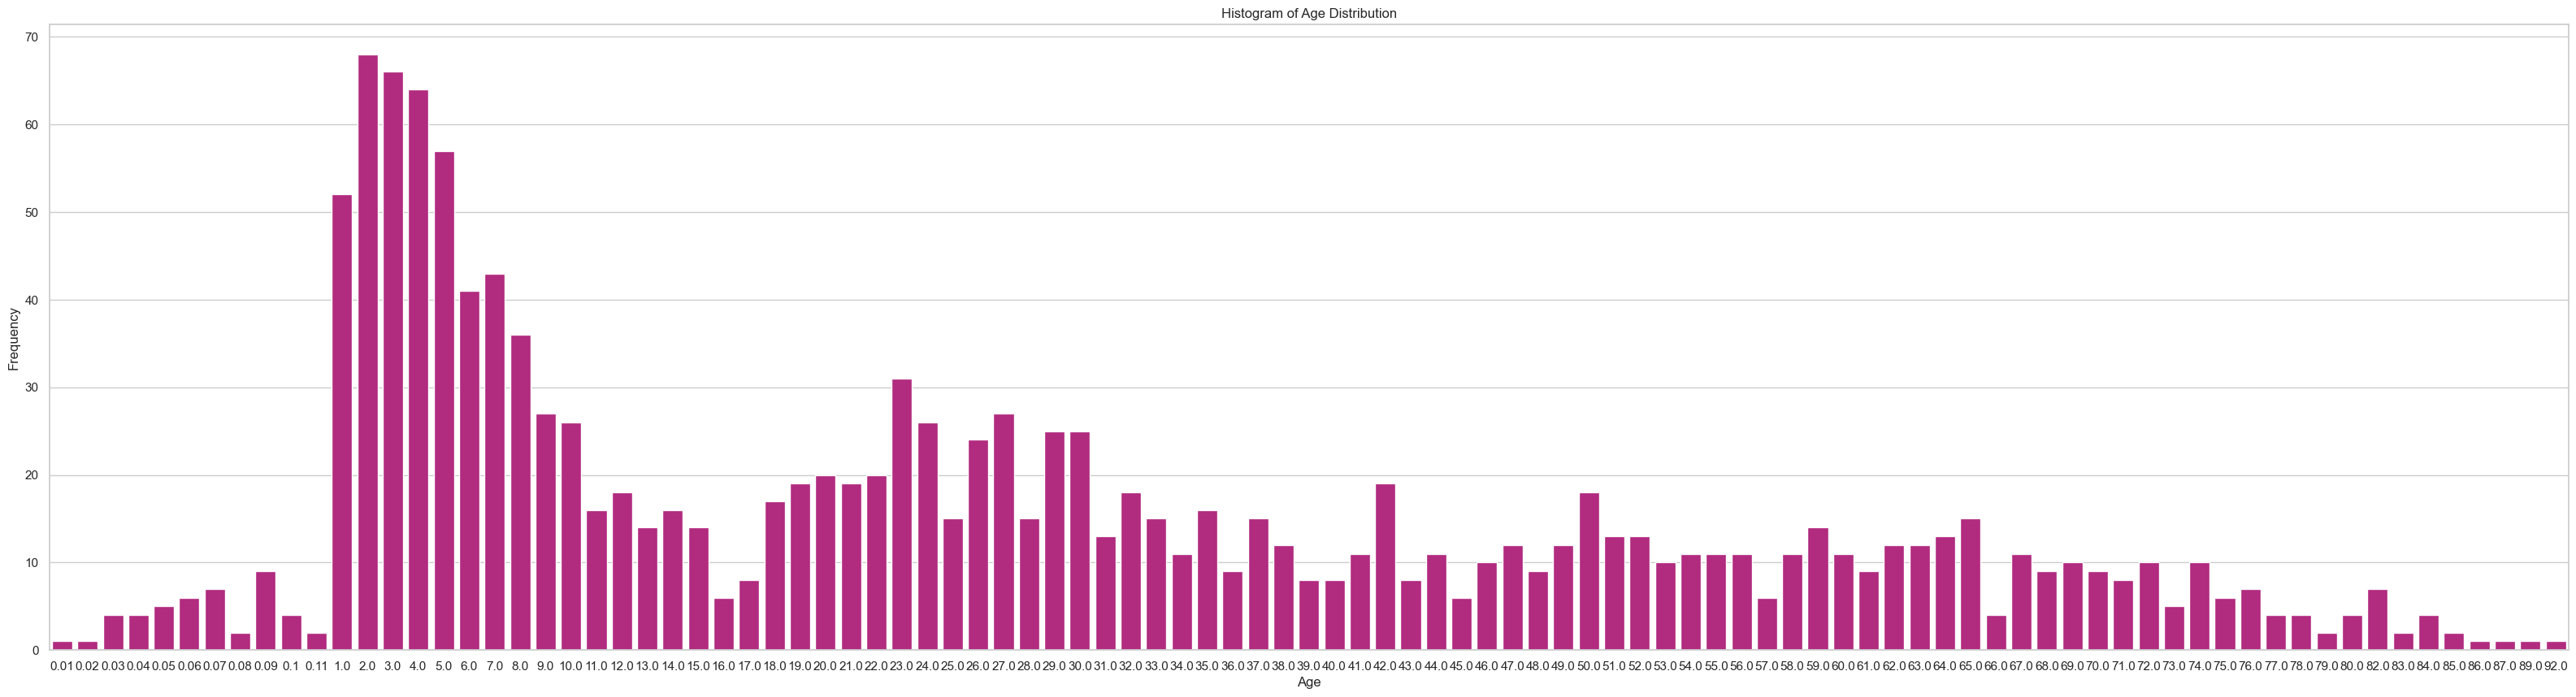

In [15]:
age_counts = df['Age'].value_counts().reset_index()
age_counts

sns.set(style="whitegrid")
plt.figure(figsize=(40,10))
sns.barplot(data=age_counts, x='index', y='Age', color='mediumvioletred')
plt.title('Histogram of Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()



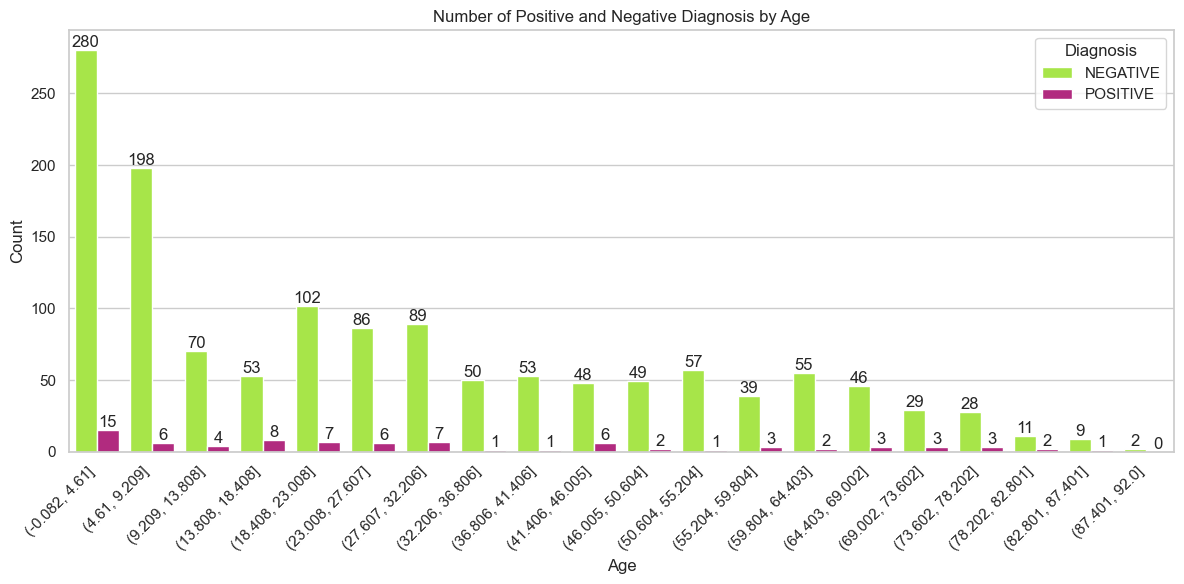

In [16]:

df['Age_Bins'] = pd.cut(df['Age'], bins=20)

diagnosis_counts = df.groupby(['Age_Bins', 'Diagnosis']).size().unstack(fill_value=0).reset_index()

diagnosis_counts_melted = diagnosis_counts.melt(id_vars=['Age_Bins'], var_name='Diagnosis', value_name='Count')
labels = ['0: Negative', '1: Positive']
# Plot
plt.figure(figsize=(12, 6))
sns.set(style="whitegrid")
ax = sns.barplot(data=diagnosis_counts_melted, x='Age_Bins', y='Count', hue='Diagnosis',
                palette={'NEGATIVE': 'greenyellow', 'POSITIVE': 'mediumvioletred'})
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Number of Positive and Negative Diagnosis by Age')
plt.legend(title='Diagnosis')
plt.xticks(rotation=45, ha='right')
ax.bar_label(ax.containers[0], fmt='%d', label_type='edge')
ax.bar_label(ax.containers[1], fmt='%d', label_type='edge')
plt.tight_layout()
plt.show()

## Pre-processing

In [17]:
#uniques values in the columns

print('Gender:',df['Gender'].unique())
print('Colour:',df['Color'].unique())
print('Transparency:',df['Transparency'].unique())
print('Glucose:',df['Glucose'].unique())
print('Protein:',df['Protein'].unique())
print('pH:',df['pH'].unique())
print('Specific gravity:',df['Specific Gravity'].unique())
print('WBC:',df['WBC'].unique())
print('RBC:',df['RBC'].unique())
print('Epithelial Cells:',df['Epithelial Cells'].unique())
print('Mucous Threads:',df['Mucous Threads'].unique())
print('Amorphous Urates:',df['Amorphous Urates'].unique())
print('Bacteria:',df['Bacteria'].unique())
print('Diagnosis:', df['Diagnosis'].unique())

Gender: ['FEMALE' 'MALE']
Colour: ['LIGHT YELLOW' 'DARK YELLOW' 'BROWN' 'YELLOW' 'AMBER' 'STRAW' 'RED'
 'REDDISH' 'REDDISH YELLOW' 'LIGHT RED']
Transparency: ['CLEAR' 'SLIGHTLY HAZY' 'CLOUDY' 'HAZY' 'TURBID']
Glucose: ['NEGATIVE' '3+' '1+' 'TRACE' '4+' '2+']
Protein: ['NEGATIVE' '1+' 'TRACE' '2+' '3+']
pH: [5.  6.  7.  7.5 6.5 8. ]
Specific gravity: [1.01  1.03  1.02  1.025 1.005 1.015]
WBC: ['1-3' '0-3' '5-8' '1-4' '3-5' '70-75' '0-2' '1-2' '2-4' '6-8' '8-10'
 '10-12' '0-1' '4-6' '20-25' '25-30' '18-25' '3-6' 'LOADED' '28-30' '5-7'
 '12-15' '15-17' '30-35' '8-12' '2-3' '35-40' '50-55' '11-15' '48-55'
 '45-50' '12-14' '14-16' '17-20' '55-58' '9-11' '>50' '15-20' '20-22'
 '18-20' '7-9' 'TNTC' '2-5' '34-36' '30-32' '23-25' '5-10' '9-15' '13-15'
 '4-8' '11-14' '10-16' '7-15' '7-8' '0-4' '15-22' '15-21' '>100' '7-10'
 '15-28' '1-5' '4-5' '2-7' '3-7' '10-15' '4-7' '79-85' '28-35' '3-10'
 '5-6' '3-4' '15-18' '4-10' '10-18' '8-11']
RBC: ['0-2' 'LOADED' '1-2' '2-4' '0-1' '6-14' '9-12' '1-3' '1

### Feature encoding 

In [18]:
# Nominal encoding (Gender and Diagnosis)
# https://www.kdnuggets.com/2021/05/deal-with-categorical-data-machine-learning.html
# https://stackoverflow.com/questions/42196589/any-way-to-get-mappings-of-a-label-encoder-in-python-pandas

le = LabelEncoder()
encoded_gender = le.fit_transform(df['Gender'])
le_gender_mapping = dict(zip(le.classes_, le.transform(le.classes_)))

encoded_diagnosis = le.fit_transform(df['Diagnosis'])
le_diagnosis_mapping = dict(zip(le.classes_, le.transform(le.classes_)))

df['Encoded Gender'] =encoded_gender 
df['Encoded Diagnosis'] = encoded_diagnosis

print(le_gender_mapping)
print(le_diagnosis_mapping)
df.head()

{'FEMALE': 0, 'MALE': 1}
{'NEGATIVE': 0, 'POSITIVE': 1}


,Age,Gender,Color,Transparency,Glucose,Protein,pH,Specific Gravity,WBC,RBC,Epithelial Cells,Mucous Threads,Amorphous Urates,Bacteria,Diagnosis,Age_Bins,Encoded Gender,Encoded Diagnosis
0,76.0,FEMALE,LIGHT YELLOW,CLEAR,NEGATIVE,NEGATIVE,5.0,1.010,1-3,0-2,OCCASIONAL,RARE,NONE SEEN,OCCASIONAL,NEGATIVE,"(73.602, 78.202]",0,0
1,9.0,MALE,DARK YELLOW,SLIGHTLY HAZY,NEGATIVE,1+,5.0,1.030,1-3,0-2,RARE,FEW,FEW,MODERATE,NEGATIVE,"(4.61, 9.209]",1,0
2,12.0,MALE,LIGHT YELLOW,SLIGHTLY HAZY,NEGATIVE,TRACE,5.0,1.030,0-3,0-2,RARE,FEW,MODERATE,RARE,NEGATIVE,"(9.209, 13.808]",1,0
3,77.0,MALE,BROWN,CLOUDY,NEGATIVE,1+,6.0,1.020,5-8,LOADED,RARE,RARE,NONE SEEN,FEW,NEGATIVE,"(73.602, 78.202]",1,0
4,29.0,FEMALE,YELLOW,HAZY,NEGATIVE,TRACE,6.0,1.025,1-4,0-2,RARE,RARE,NONE SEEN,FEW,NEGATIVE,"(27.607, 32.206]",0,0


In [19]:
# Ordinal encoding (Color, transparency, Glucose, Protein, Epithelial Cells, Mucous Threads, Amorphous Urates, Bacteria )

color_dict = {'LIGHT YELLOW':0, 'STRAW':1, 'AMBER':2, 'BROWN':3, 'DARK YELLOW':4, 'YELLOW':5, 'REDDISH YELLOW':6, 'REDDISH':7,
              'LIGHT RED':8,'RED':9}

trans_dict = {'CLEAR':0, 'SLIGHTLY HAZY':1, 'HAZY':2, 'CLOUDY':3, 'TURBID':4}

glucose_dict = {'NEGATIVE':0, 'TRACE':1, '1+':2, '2+':3, '3+':4, '4+':5}

protein_dict= {'NEGATIVE':0, 'TRACE':1, '1+':2, '2+':3, '3+':4}

quantity_dict = {'NONE SEEN':0, 'RARE':1, 'FEW':2, 'OCCASIONAL':3, 'MODERATE':4, 'LOADED':5, 'PLENTY':6}

df["Encoded Color"] = df['Color'].map(color_dict)

df["Encoded Transparency"] = df['Transparency'].map(trans_dict)

df["Encoded Glucose"] = df['Glucose'].map(glucose_dict)

df["Encoded Protein"] = df['Protein'].map(protein_dict)

df["Encoded Epithelial cells"] = df['Epithelial Cells'].map(quantity_dict)

df["Encoded Mucous Threads"] = df['Mucous Threads'].map(quantity_dict)

df["Encoded Amorphous Urates"] = df['Amorphous Urates'].map(quantity_dict)

df["Encoded Bacteria"] = df['Bacteria'].map(quantity_dict)



In [20]:
# https://www.kaggle.com/code/avarice02/uti-classification-using-ml-and-dl-models
# WBC and RBC column are a load of string number ranges
# if the string starts with > an int of the folowing number will be returned
# if the data is 'LOADED' or 'TNTC' (too numerous to count) a value of 150 is returned as this is higher than the other
# values and string ranges 
# for the remaining string ranges we are spilt this string at '-' and finding the middle value between the remaing values 

def encoding_wbc_rbc(data):
    if data == '>50' or data =='>100':
        return int(data[1:])
    elif data == 'LOADED' or data =='TNTC':
        return 150
    else:
        start, end = map(int, data.split('-'))
        return start + (end - start) / 2
    
df['Encoded WBC'] = df['WBC'].apply(encoding_wbc_rbc)
df['Encoded RBC'] = df['RBC'].apply(encoding_wbc_rbc)


    

In [21]:
uti = df[['Age', 'Encoded Gender', 'pH', 'Specific Gravity', 'Encoded Color', 'Encoded Transparency',
          'Encoded Glucose', 'Encoded Protein', 'Encoded Epithelial cells', 'Encoded Mucous Threads', 
         'Encoded Amorphous Urates', 'Encoded Bacteria', 'Encoded WBC', 'Encoded RBC', 'Encoded Diagnosis']]

uti.rename(columns={'Encoded Gender': 'Gender', 'Encoded Color': 'Color', 'Encoded Transparency': 'Transparency',
          'Encoded Glucose': 'Glucose', 'Encoded Protein': 'Protein', 'Encoded Epithelial cells': 'Epithellial Cells',
          'Encoded Mucous Threads':'Mucous Threads', 'Encoded Amorphous Urates':'Amorphous Uractes',
                    'Encoded Bacteria': 'Bacteria', 'Encoded WBC': 'WBC', 'Encoded RBC':'RBC', 'Encoded Diagnosis':'Diagnosis'}
           ,inplace = True)
uti

,Age,Gender,pH,Specific Gravity,Color,Transparency,Glucose,Protein,Epithellial Cells,Mucous Threads,Amorphous Uractes,Bacteria,WBC,RBC,Diagnosis
0,76.00,0,5.0,1.010,0,0,0,0,3,1,0,3,2.0,1.0,0
1,9.00,1,5.0,1.030,4,1,0,2,1,2,2,4,2.0,1.0,0
2,12.00,1,5.0,1.030,0,1,0,1,1,2,4,1,1.5,1.0,0
3,77.00,1,6.0,1.020,3,3,0,2,1,1,0,2,6.5,150.0,0
4,29.00,0,6.0,1.025,5,2,0,1,1,1,0,2,2.5,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1431,0.06,1,6.0,1.015,5,0,0,0,1,2,0,1,1.5,0.5,0
1432,42.00,1,6.5,1.010,5,0,0,0,1,0,0,1,1.0,1.0,0
1433,47.00,0,6.0,1.030,4,0,0,1,4,4,0,1,3.0,1.0,0
1434,57.00,0,5.0,1.030,4,0,0,1,6,6,0,2,1.0,1.0,0


### Correlation Matrix

Text(0.5, 1.0, 'Correlation Heatmap on Inbalanced Data')

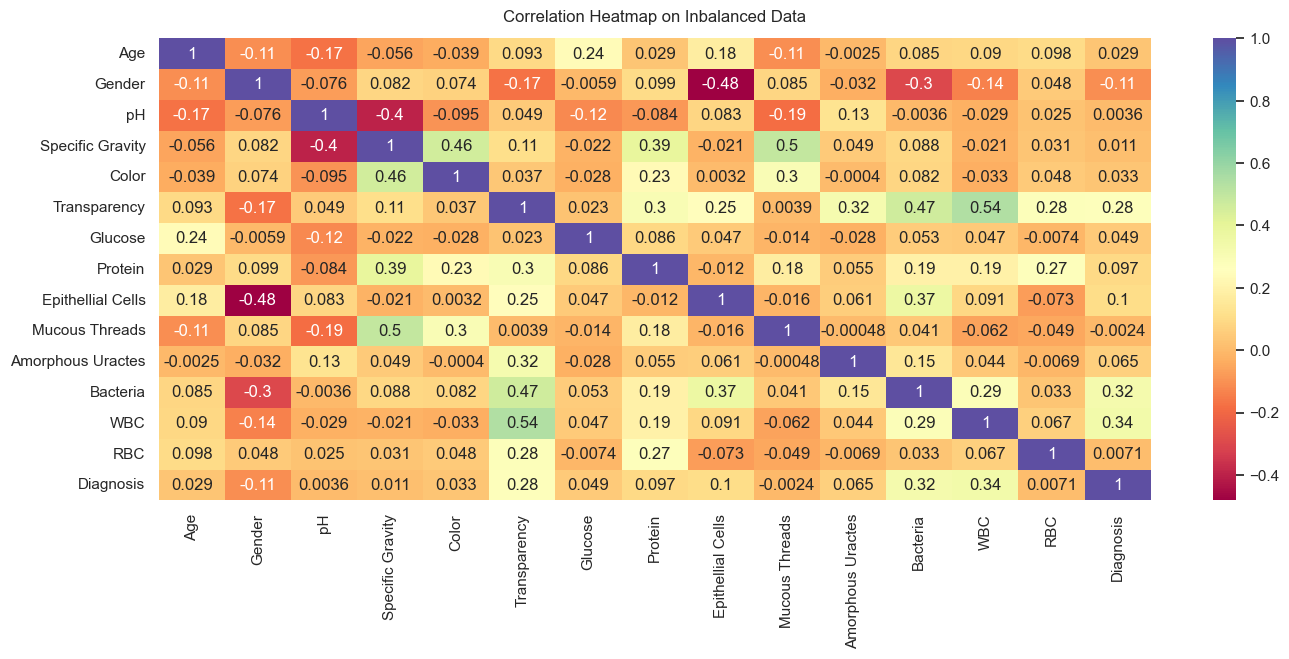

In [22]:
#correlation matrix on inbalnaced data
plt.figure(figsize=(16, 6))
heatmap=sns.heatmap(uti.corr(),annot=True, cmap='Spectral')
heatmap.set_title('Correlation Heatmap on Inbalanced Data', fontdict={'fontsize':12}, pad=12)

## Train Test Split


In [23]:

X = uti.drop(['Diagnosis'], axis=1)
y = uti['Diagnosis']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print('Training data:', X_train.shape, y_train.shape)
print('Testing data:', X_test.shape, y_test.shape)

Training data: (1004, 14) (1004,)
Testing data: (431, 14) (431,)


In [24]:
print(y_train.value_counts())
print(y_test.value_counts())

0    953
1     51
Name: Diagnosis, dtype: int64
0    401
1     30
Name: Diagnosis, dtype: int64


### Scale data

In [25]:
# to avoid data leakeage scale the train and the test seperately 
# Only scaling the the feature vairables as the target is binary 
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_train

array([[ 0.32032175, -0.88325639, -0.0428883 , ...,  0.06814194,
        -0.06122512, -0.19663859],
       [-1.13105374,  1.1321741 ,  0.80142261, ...,  0.06814194,
        -0.1529372 , -0.16207536],
       [ 1.51557216, -0.88325639, -0.0428883 , ..., -0.67549403,
        -0.26757731, -0.16207536],
       ...,
       [-1.0029912 , -0.88325639,  0.80142261, ..., -0.67549403,
        -0.31343335, -0.19663859],
       [-0.96030369,  1.1321741 , -0.0428883 , ..., -0.67549403,
        -0.29050533, -0.23120181],
       [-0.06386588,  1.1321741 ,  0.80142261, ..., -0.67549403,
        -0.29050533, -0.19663859]])

In [26]:
# scaling test separetly to avoid data leakage 
X_test=scaler.fit_transform(X_test)
X_test

array([[ 1.03918613,  1.18086597, -0.19270809, ..., -0.68751834,
        -0.29001681, -0.01984559],
       [-0.66137218,  1.18086597, -1.83740487, ...,  0.02996448,
        -0.19530399, -0.20992228],
       [-0.19371865, -0.84683616,  0.6296403 , ...,  0.02996448,
        -0.14794758, -0.20992228],
       ...,
       [ 1.33678384, -0.84683616, -0.19270809, ...,  0.02996448,
         6.76608822, -0.11488394],
       [ 1.08170009, -0.84683616,  0.6296403 , ...,  0.02996448,
         4.39826774, -0.11488394],
       [-0.2362326 , -0.84683616, -0.19270809, ...,  0.02996448,
         6.76608822, -0.01984559]])

In [27]:
# checking for mean of 0 & std of 1
print(X_train.mean())
print(X_train.std())

-2.931949251144409e-16
1.0


## Feature selection

In [28]:
# Mutual information
mutual_info = mutual_info_classif(X_train, y_train)
mutual_info

array([0.01245566, 0.00355904, 0.01272883, 0.00337001, 0.        ,
       0.03117631, 0.0064233 , 0.        , 0.0018363 , 0.00668518,
       0.        , 0.03995787, 0.06781646, 0.00644299])

In [35]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = X.columns
mutual_info.sort_values(ascending=False)

WBC                  0.072181
Bacteria             0.052095
Transparency         0.026116
Protein              0.012599
Age                  0.008400
pH                   0.007081
Gender               0.005919
RBC                  0.005120
Specific Gravity     0.003982
Epithellial Cells    0.001649
Color                0.000095
Glucose              0.000000
Mucous Threads       0.000000
Amorphous Uractes    0.000000
dtype: float64

In [30]:
#feature selection only on training data so that the test data remians unseen
# https://www.rasgoml.com/feature-engineering-tutorials/feature-selection-using-mutual-information-in-scikit-learn

In [31]:
selector = SelectKBest(mutual_info_classif, k=3)
X_fs = selector.fit_transform(X_train, y_train)
cols = selector.get_support(indices=True)
selected_columns = X.iloc[:,cols].columns.tolist()
selected_columns


['Transparency', 'Bacteria', 'WBC']

In [32]:
selector = SelectPercentile(mutual_info_classif, percentile=25)
X_fs = selector.fit_transform(X_train, y_train)
cols = selector.get_support(indices=True)
selected_columns = X.iloc[:,cols].columns.tolist()
selected_columns

['Specific Gravity', 'Transparency', 'Bacteria', 'WBC']

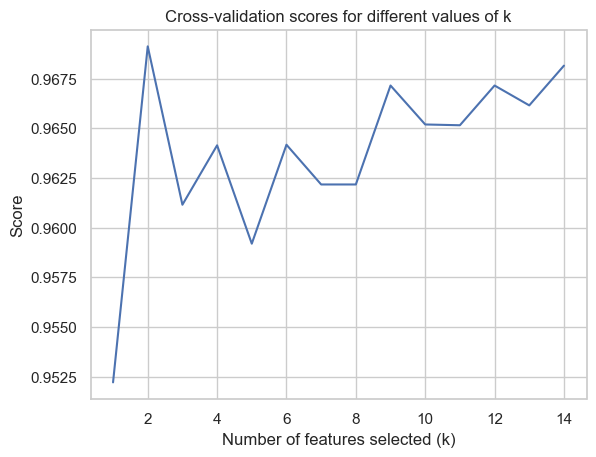

Best value of k: 2


In [34]:
# Random Forest
# finding the best value of K

rfc = RandomForestClassifier(random_state=42) 

# k values to try
k_values = range(1, X_train.shape[1] + 1) 

cv_scores = []

for k in k_values:
    selector = SelectKBest(mutual_info_classif, k=k)
    X_fs = selector.fit_transform(X_train, y_train)
    scores = cross_val_score(rfc, X_fs, y_train, cv=10)  
    cv_scores.append(np.mean(scores))

plt.plot(k_values, cv_scores)
plt.xlabel('Number of features selected (k)')
plt.ylabel('Score')
plt.title('Cross-validation scores for different values of k')
plt.show()

# value of k with the highest cross-val score
best_k = k_values[np.argmax(cv_scores)]
print("Best value of k:", best_k)

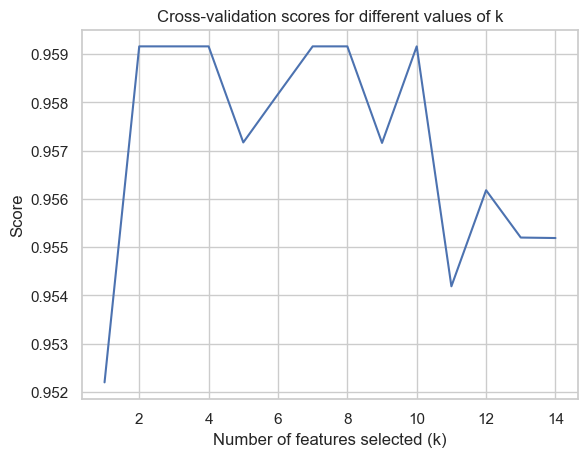

Best value of k: 2


In [45]:

# Logistic regression
lr = LogisticRegression(random_state=42) 

# k values to try
k_values = range(1, X_train.shape[1] + 1) 

cv_scores = []

for k in k_values:
    selector = SelectKBest(mutual_info_classif, k=k)
    X_fs = selector.fit_transform(X_train, y_train)
    scores = cross_val_score(lr, X_fs, y_train, cv=10)  
    cv_scores.append(np.mean(scores))

plt.plot(k_values, cv_scores)
plt.xlabel('Number of features selected (k)')
plt.ylabel('Score')
plt.title('Cross-validation scores for different values of k')
plt.show()

# value of k with the highest cross-val score
best_k = k_values[np.argmax(cv_scores)]
print("Best value of k:", best_k)

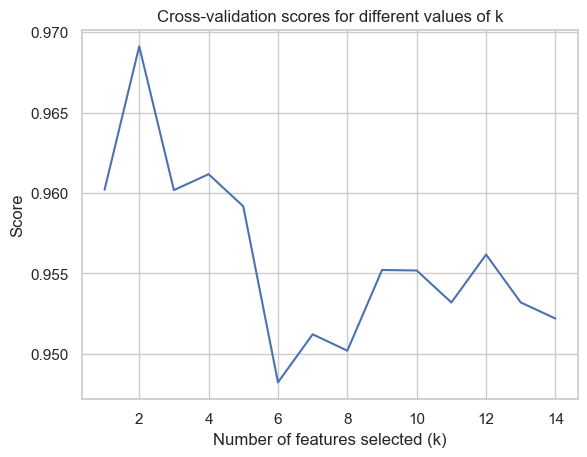

Best value of k: 2


In [41]:

knn = KNeighborsClassifier(n_neighbors=3)

# k values to try
k_values = range(1, X_train.shape[1] + 1) 

cv_scores = []

for k in k_values:
    selector = SelectKBest(mutual_info_classif, k=k)
    X_fs = selector.fit_transform(X_train, y_train)
    scores = cross_val_score(knn, X_fs, y_train, cv=10)  
    cv_scores.append(np.mean(scores))

plt.plot(k_values, cv_scores)
plt.xlabel('Number of features selected (k)')
plt.ylabel('Score')
plt.title('Cross-validation scores for different values of k')
plt.show()

# value of k with the highest cross-val score
best_k = k_values[np.argmax(cv_scores)]
print("Best value of k:", best_k)

In [29]:
# using the best value of K 
selector = SelectKBest(mutual_info_classif, k=2)
X_fs = selector.fit_transform(X_train, y_train)
cols = selector.get_support(indices=True)
selected_columns = X.iloc[:,cols].columns.tolist()
selected_columns

['Bacteria', 'WBC']

## Feature importance 

https://towardsdatascience.com/machine-learning-workflow-on-diabetes-data-part-02-11262b7f7a5c#:~:text=Logistic%20Regression%20%E2%80%94%20Feature%20Selection&text=RFECV%20exposes%20support_%20which%20is,can%20use%20the%20following%20code.

In [51]:
# Initialize StratifiedKFold
strat_k_fold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

logreg_model = LogisticRegression()
rfecv = RFECV(estimator=logreg_model, step=1, cv=strat_k_fold, scoring='accuracy')
rfecv.fit(X_train, y_train)

RFECV(cv=StratifiedKFold(n_splits=10, random_state=42, shuffle=True),
      estimator=LogisticRegression(), scoring='accuracy')

In [52]:
selected_columns_rfecv = X.columns[rfecv.support_]

# Now you have the names of the selected features
print(selected_columns_rfecv)

Index(['Bacteria', 'WBC'], dtype='object')


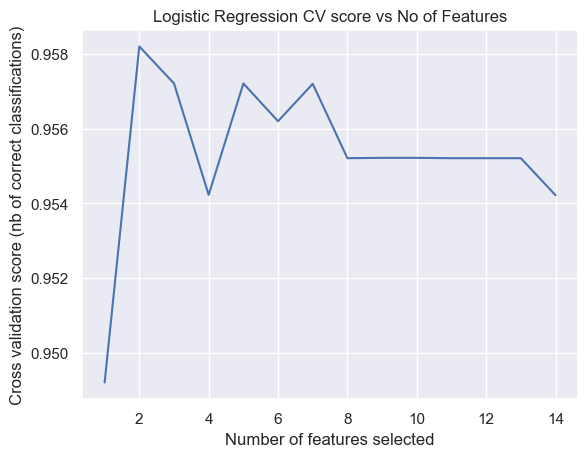

In [53]:
plt.figure()
plt.title('Logistic Regression CV score vs No of Features')
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.cv_results_['mean_test_score']) + 1), rfecv.cv_results_['mean_test_score'])
plt.show()

## Dealing with Imbalanced Data

### Synthetic Minority Oversampling Technique (SMOTE)
### On feature selcted data 


In [30]:
# counting the number of negative and postive diagnosis  
print(y_train.value_counts())

0    953
1     51
Name: Diagnosis, dtype: int64


In [31]:
X.iloc[:,[11,12]]

,Bacteria,WBC
0,3,2.0
1,4,2.0
2,1,1.5
3,2,6.5
4,2,2.5
...,...,...
1431,1,1.5
1432,1,1.0
1433,1,3.0
1434,2,1.0


In [32]:
X_train[:,[11,12]]

array([[ 0.06814194, -0.06122512],
       [ 0.06814194, -0.1529372 ],
       [-0.67549403, -0.26757731],
       ...,
       [-0.67549403, -0.31343335],
       [-0.67549403, -0.29050533],
       [-0.67549403, -0.29050533]])

Counter({0: 953, 1: 51})


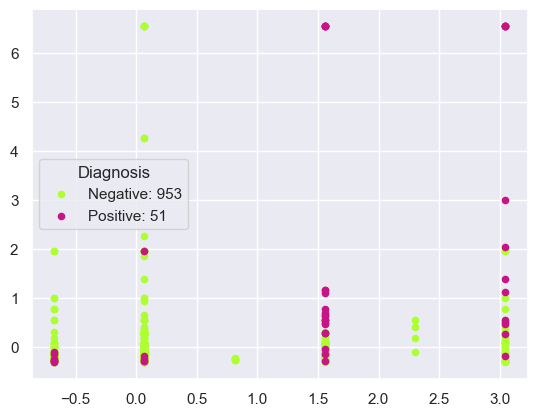

In [33]:

smot_plot = X_train[:, [11, 12]]
counter = Counter(y_train)
print(counter)
labels = ['Negative: 953', 'Positive: 51']

# Scatter plot of examples by class label
plt.figure()
sns.set_style('darkgrid')
for label, _ in counter.items():
    row_indices = (y_train == label)  # Get indices of data points for the current class
    color = 'greenyellow' if label == 0 else 'mediumvioletred'
    plt.scatter(smot_plot[row_indices, 0], smot_plot[row_indices, 1], label=str(label), color=color, s=20)  # Plot points for the current class
plt.legend(title='Diagnosis', labels=labels)
plt.savefig('before_smote_2_feature.png', bbox_inches='tight')
plt.show()



In [34]:
# https://arxiv.org/abs/1106.1813 
# https://www.analyticsvidhya.com/blog/2020/10/overcoming-class-imbalance-using-smote-techniques/
# https://medium.com/@corymaklin/synthetic-minority-over-sampling-technique-smote-7d419696b88c#:~:text=SMOTE%20is%20a%20technique%20to,minority%20class)%20in%20feature%20space.
# https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/   -- for visualising 

In [35]:
sm = SMOTE(random_state=42)

In [36]:
X_sm_fs, y_sm_fs = sm.fit_resample(X_fs, y_train)

In [37]:
print(y_sm_fs.value_counts())

0    953
1    953
Name: Diagnosis, dtype: int64


Counter({0: 953, 1: 953})


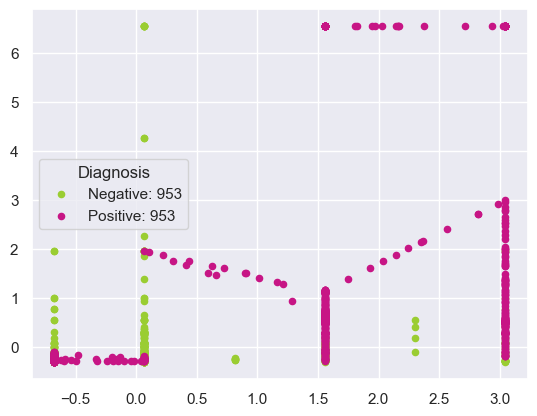

In [38]:
smot_plot2 = X_sm_fs
counter = Counter(y_sm_fs)
print(counter)
labels = ['Negative: 953', 'Positive: 953']

# Scatter plot of examples by class label
plt.figure()
sns.set_style('darkgrid')
for label, _ in counter.items():
    row_indices = (y_sm_fs == label)  # Get indices of data points for the current class
    color = 'yellowgreen' if label == 0 else 'mediumvioletred'
    plt.scatter(smot_plot2[row_indices, 0], smot_plot2[row_indices, 1], label=str(label), color=color, s=20)  # Plot points for the current class

# Add legend and show plot
plt.legend(title='Diagnosis', labels=labels)
plt.savefig('after_smote_2_feature.png', bbox_inches='tight')
plt.show()

### SMOTE on all features

In [39]:
print(y_train.value_counts())

0    953
1     51
Name: Diagnosis, dtype: int64


Counter({0: 953, 1: 51})


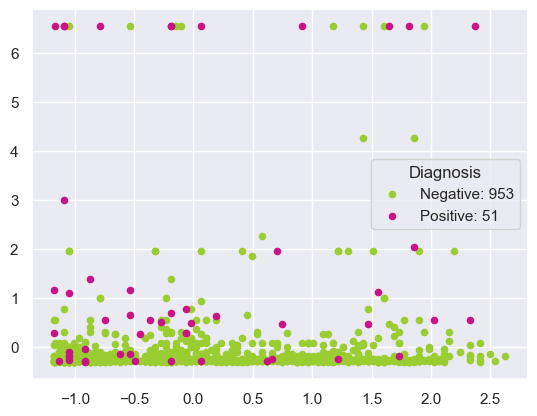

In [154]:
from collections import Counter
smot_plot3 = X_train[:, [0, 12]]
counter = Counter(y_train)
print(counter)
labels = ['Negative: 953', 'Positive: 51']

# Scatter plot of examples by class label
plt.figure()
for label, _ in counter.items():
    row_indices = (y_train == label)  # Get indices of data points for the current class
    color = 'yellowgreen' if label == 0 else 'mediumvioletred'
    plt.scatter(smot_plot3[row_indices, 0], smot_plot3[row_indices, 1], label=str(label), color=color, s=20)  # Plot points for the current class

# Add legend and show plot
plt.legend(title='Diagnosis', labels=labels)
plt.savefig('before_smote_all_feature.png', bbox_inches='tight')
plt.show()

In [41]:
X_sm, y_sm = sm.fit_resample(X_train, y_train)
print(y_sm.value_counts())

0    953
1    953
Name: Diagnosis, dtype: int64


Counter({0: 953, 1: 953})


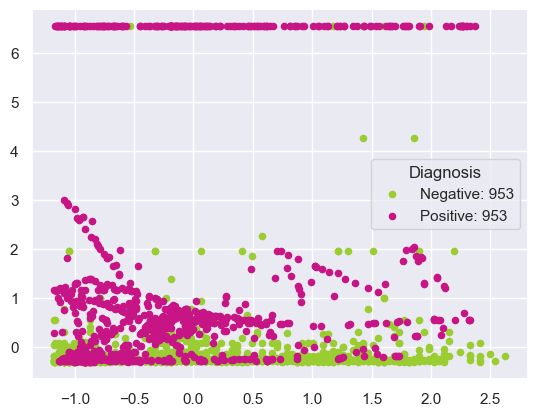

In [155]:
smot_plot4 = X_sm[:, [0, 12]]
counter = Counter(y_sm)
print(counter)
labels = ['Negative: 953', 'Positive: 953']

# Scatter plot of examples by class label
plt.figure()
for label, _ in counter.items():
    row_indices = (y_sm == label)  # Get indices of data points for the current class
    color = 'yellowgreen' if label == 0 else 'mediumvioletred'
    plt.scatter(smot_plot4[row_indices, 0], smot_plot4[row_indices, 1], label=str(label), color=color, s=20)  # Plot points for the current class

# Add legend and show plot
plt.legend(title='Diagnosis', labels=labels)
plt.savefig('after_smote_all_feature.png', bbox_inches='tight')
plt.show()

### Undersampling technique (on featured selected) 

In [43]:
print(y_train.value_counts())

0    953
1     51
Name: Diagnosis, dtype: int64


In [44]:

undersample = RandomUnderSampler(sampling_strategy='majority')
X_under_fs, y_under_fs = undersample.fit_resample(X_fs, y_train)

In [45]:
print(y_under_fs.value_counts())

0    51
1    51
Name: Diagnosis, dtype: int64


### Undersampling technique (on ALL features)

In [46]:
X_under, y_under = undersample.fit_resample(X_train, y_train)

In [47]:
print(y_under.value_counts())

0    51
1    51
Name: Diagnosis, dtype: int64


## Reducing TEST data to two features (WBC and Bacteria)

In [49]:
X_test_fs = X_test[:,[11,12]]



https://towardsdatascience.com/top-10-binary-classification-algorithms-a-beginners-guide-feeacbd7a3e2

https://medium.com/@dtuk81/confusion-matrix-visualization-fc31e3f30fea    code adapted from

# KNN PARAMETER TUNING


In [50]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

### KNN fs SMOTE

In [51]:
# Grid search
knn = KNeighborsClassifier()

# define the parameter values that should be searched
k_range = list(range(1, 31))
weight_options = ['uniform', 'distance']

# create a parameter grid: map the parameter names to the values that should be searched
param_grid = dict(n_neighbors=k_range, weights=weight_options)
print(param_grid)

grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy')

{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30], 'weights': ['uniform', 'distance']}


In [52]:
# fit the grid with data
grid.fit(X_sm_fs, y_sm_fs)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [53]:
print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)

0.9386111876550014
{'n_neighbors': 3, 'weights': 'distance'}
KNeighborsClassifier(n_neighbors=3, weights='distance')


In [122]:
# train the model using the best parameters
best_knn_fs_sm = KNeighborsClassifier(n_neighbors=3,weights='distance')
best_knn_fs_sm.fit(X_sm_fs, y_sm_fs)
scores_best_knn_fs_sm = cross_val_score(best_knn_fs_sm, X_sm_fs, y_sm_fs, cv=10, scoring='accuracy')
print("Cross-Validation Accuracy:",scores_best_knn_fs_sm.mean())

Cross-Validation Accuracy: 0.9386111876550014


In [123]:
# predicting test data
y_pred_knn_fs_sm = best_knn_fs_sm.predict(X_test_fs)
accuracy = accuracy_score(y_test, y_pred_knn_fs_sm)
print("Test Accuracy:", accuracy)

Test Accuracy: 0.4245939675174014


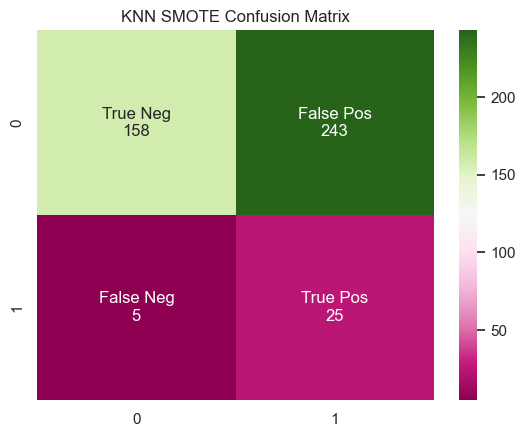

              precision    recall  f1-score   support

 0: Negative       0.97      0.39      0.56       401
 1: Positive       0.09      0.83      0.17        30

    accuracy                           0.42       431
   macro avg       0.53      0.61      0.36       431
weighted avg       0.91      0.42      0.53       431



In [57]:
knn_confusion_hp_fs_sm=confusion_matrix(y_test, y_pred_knn_fs_sm)

matrix_names = ['True Neg','False Pos','False Neg','True Pos']
matrix_counts = ['{0:0.0f}'.format(value) for value in
                knn_confusion_hp_fs_sm.flatten()]
labels = [f'{v1}\n{v2}' for v1, v2 in
          zip(matrix_names,matrix_counts)]
labels = np.asarray(labels).reshape(2,2)

plt.figure()
sns.heatmap(knn_confusion_hp_fs_sm, annot=labels, fmt='', cmap='PiYG')
plt.title('KNN SMOTE Confusion Matrix')
plt.savefig('KNN SMOTE Confusion Matrix', bbox_inches='tight')
plt.show()

target_names = ['0: Negative', '1: Positive']
print(classification_report(y_test, y_pred_knn_fs_sm, target_names=target_names))

### KNN FS under

In [100]:
# Grid search
knn = KNeighborsClassifier()

# define the parameter values that should be searched
k_range = list(range(1, 31))
weight_options = ['uniform', 'distance']

# create a parameter grid: map the parameter names to the values that should be searched
param_grid = dict(n_neighbors=k_range, weights=weight_options)
print(param_grid)

grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy')

{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30], 'weights': ['uniform', 'distance']}


In [101]:
# fit the grid with data
grid.fit(X_under_fs, y_under_fs)

print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)

0.8227272727272726
{'n_neighbors': 4, 'weights': 'uniform'}
KNeighborsClassifier(n_neighbors=4)


In [99]:
best_knn_fs_under = KNeighborsClassifier(n_neighbors=4)
best_knn_fs_under.fit(X_under_fs, y_under_fs)
scores_best_knn_fs_under = cross_val_score(best_knn_fs_under, X_under_fs, y_under_fs, cv=10, scoring='accuracy')
print("Cross-Validation Accuracy:",scores_best_knn_fs_under.mean())

Cross-Validation Accuracy: 0.8227272727272726


In [102]:
y_pred_knn_fs_under = best_knn_fs_under.predict(X_test_fs)
accuracy = accuracy_score(y_test, y_pred_knn_fs_under)
print("Test Accuracy:", accuracy)

Test Accuracy: 0.8955916473317865


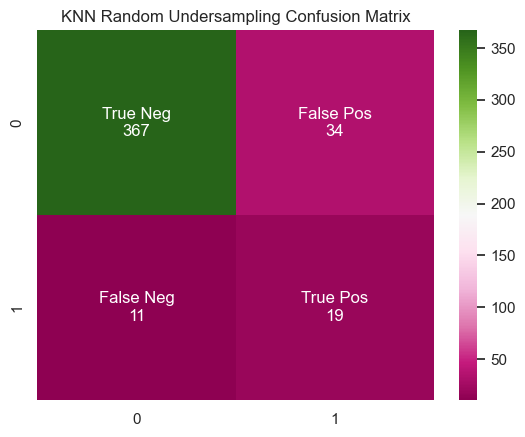

              precision    recall  f1-score   support

 0: Negative       0.97      0.92      0.94       401
 1: Positive       0.36      0.63      0.46        30

    accuracy                           0.90       431
   macro avg       0.66      0.77      0.70       431
weighted avg       0.93      0.90      0.91       431



In [104]:
knn_confusion_hp_fs_under=confusion_matrix(y_test, y_pred_knn_fs_under)

matrix_names = ['True Neg','False Pos','False Neg','True Pos']
matrix_counts = ['{0:0.0f}'.format(value) for value in
                knn_confusion_hp_fs_under.flatten()]
labels = [f'{v1}\n{v2}' for v1, v2 in
          zip(matrix_names,matrix_counts)]
labels = np.asarray(labels).reshape(2,2)

plt.figure()
sns.heatmap(knn_confusion_hp_fs_under, annot=labels, fmt='', cmap='PiYG')
plt.title('KNN Random Undersampling Confusion Matrix')
plt.savefig('KNN Random Undersampling Confusion Matrix', bbox_inches='tight')
plt.show()

print(classification_report(y_test, y_pred_knn_fs_under, target_names=target_names))

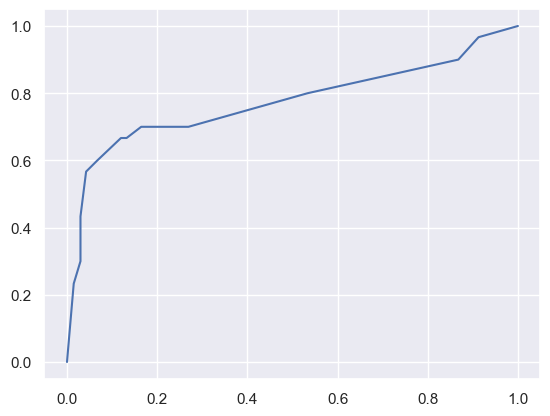

In [128]:
#KNN FS UNDERSAMPLING
plt.figure(0).clf()

y_pred = best_knn_fs_under.predict_proba(X_test_fs)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
auc = round(metrics.roc_auc_score(y_test, y_pred), 4)
plt.plot(fpr,tpr,label="KNN Undersampling, AUC="+str(auc))
plt.show()

### KNN on imbalanced data

In [128]:
# Grid search
knn = KNeighborsClassifier()

# define the parameter values that should be searched
k_range = list(range(1, 31))
weight_options = ['uniform', 'distance']

# create a parameter grid: map the parameter names to the values that should be searched
param_grid = dict(n_neighbors=k_range, weights=weight_options)
print(param_grid)

grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy')

{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30], 'weights': ['uniform', 'distance']}


In [129]:
grid.fit(X_train, y_train)

print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)

0.958168316831683
{'n_neighbors': 12, 'weights': 'distance'}
KNeighborsClassifier(n_neighbors=12, weights='distance')


In [130]:
best_knn_im = KNeighborsClassifier(n_neighbors=12, weights='distance')
best_knn_im.fit(X_train, y_train)
scores_best_knn_im = cross_val_score(best_knn_im, X_train, y_train, cv=10, scoring='accuracy')
print("Cross-Validation Accuracy:",scores_best_knn_im.mean())

Cross-Validation Accuracy: 0.958168316831683


In [131]:
y_predict = best_knn_im.predict(X_test)
accuracy = accuracy_score(y_test, y_predict)
print("Test Accuracy:", accuracy)

Test Accuracy: 0.9280742459396751


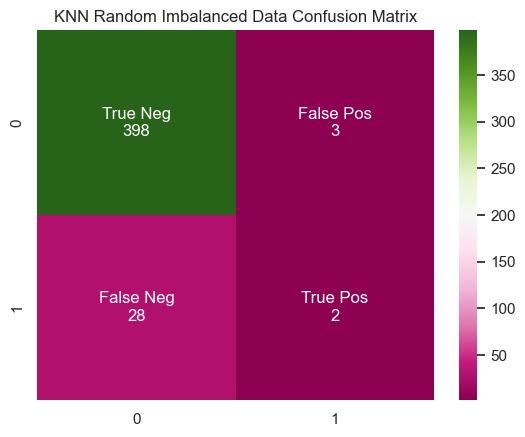

              precision    recall  f1-score   support

 0: Negative       0.93      0.99      0.96       401
 1: Positive       0.40      0.07      0.11        30

    accuracy                           0.93       431
   macro avg       0.67      0.53      0.54       431
weighted avg       0.90      0.93      0.90       431



In [81]:
knn_confusion=confusion_matrix(y_test, y_predict)

matrix_names = ['True Neg','False Pos','False Neg','True Pos']
matrix_counts = ['{0:0.0f}'.format(value) for value in
                knn_confusion.flatten()]
labels = [f'{v1}\n{v2}' for v1, v2 in
          zip(matrix_names,matrix_counts)]
labels = np.asarray(labels).reshape(2,2)

plt.show()
sns.heatmap(knn_confusion, annot=labels, fmt='', cmap='PiYG')
plt.title('KNN Random Imbalanced Data Confusion Matrix')
plt.savefig('KNN Random Imbalanced Data Confusion Matrix', bbox_inches='tight')
plt.show()

print(classification_report(y_test, y_predict, target_names=target_names))

### KNN ALL SMOTE

In [68]:
knn = KNeighborsClassifier()

# define the parameter values that should be searched
k_range = list(range(1, 31))
weight_options = ['uniform', 'distance']

# create a parameter grid: map the parameter names to the values that should be searched
param_grid = dict(n_neighbors=k_range, weights=weight_options)
print(param_grid)

grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy')

# fit the grid with data
grid.fit(X_sm, y_sm)

print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)

{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30], 'weights': ['uniform', 'distance']}
0.9643235050978232
{'n_neighbors': 2, 'weights': 'uniform'}
KNeighborsClassifier(n_neighbors=2)


In [70]:
best_knn_sm = KNeighborsClassifier(n_neighbors=2)
best_knn_sm.fit(X_sm, y_sm)

scores_best_knn_sm = cross_val_score(best_knn_sm, X_sm, y_sm, cv=10, scoring='accuracy')
print("Cross-Validation Accuracy:",scores_best_knn_sm.mean())

y_pred_knn_sm = best_knn_sm.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_knn_sm)
print("Test Accuracy:", accuracy)

Cross-Validation Accuracy: 0.9643235050978232
Test Accuracy: 0.8747099767981439


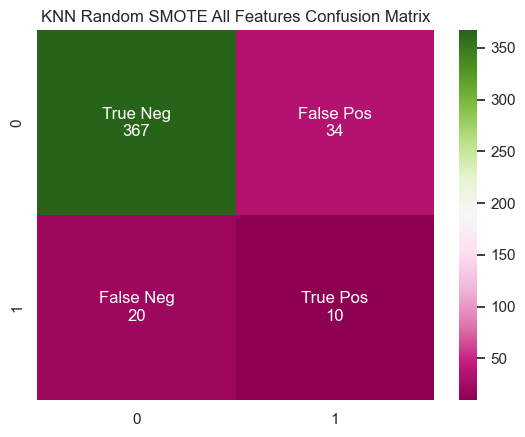

              precision    recall  f1-score   support

 0: Negative       0.95      0.92      0.93       401
 1: Positive       0.23      0.33      0.27        30

    accuracy                           0.87       431
   macro avg       0.59      0.62      0.60       431
weighted avg       0.90      0.87      0.89       431



In [182]:
knn_confusion_hp_sm=confusion_matrix(y_test, y_pred_knn_sm)
target_names = ['0: Negative', '1: Positive']

matrix_names = ['True Neg','False Pos','False Neg','True Pos']
matrix_counts = ['{0:0.0f}'.format(value) for value in
                knn_confusion_hp_sm.flatten()]
labels = [f'{v1}\n{v2}' for v1, v2 in
          zip(matrix_names,matrix_counts)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(knn_confusion_hp_sm, annot=labels, fmt='', cmap='PiYG')
plt.title('KNN Random SMOTE All Features Confusion Matrix')
plt.savefig('KNN SMOTE All Features', bbox_inches='tight')
plt.show()

print(classification_report(y_test, y_pred_knn_sm, target_names=target_names))

### KNN ALL undersampling

In [73]:
knn = KNeighborsClassifier()

# define the parameter values that should be searched
k_range = list(range(1, 31))
weight_options = ['uniform', 'distance']

# create a parameter grid: map the parameter names to the values that should be searched
param_grid = dict(n_neighbors=k_range, weights=weight_options)
print(param_grid)

grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy')

# fit the grid with data
grid.fit(X_under, y_under)

print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)

{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30], 'weights': ['uniform', 'distance']}
0.7772727272727273
{'n_neighbors': 11, 'weights': 'uniform'}
KNeighborsClassifier(n_neighbors=11)


In [76]:
best_knn_under = KNeighborsClassifier(n_neighbors=11)
best_knn_under.fit(X_under, y_under)

scores_best_knn_under = cross_val_score(best_knn_under, X_under, y_under, cv=10, scoring='accuracy')
print("Cross-Validation Accuracy:",scores_best_knn_under.mean())

y_pred_knn_under= best_knn_under.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_knn_under)
print("Test Accuracy:", accuracy)

Cross-Validation Accuracy: 0.7772727272727273
Test Accuracy: 0.8375870069605569


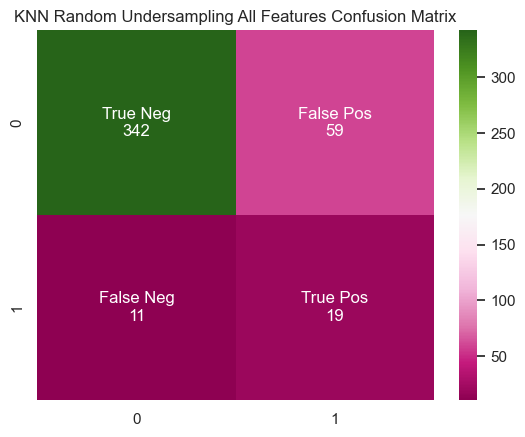

              precision    recall  f1-score   support

 0: Negative       0.97      0.85      0.91       401
 1: Positive       0.24      0.63      0.35        30

    accuracy                           0.84       431
   macro avg       0.61      0.74      0.63       431
weighted avg       0.92      0.84      0.87       431



In [174]:
knn_confusion_hp_under=confusion_matrix(y_test, y_pred_knn_under)

matrix_names = ['True Neg','False Pos','False Neg','True Pos']
matrix_counts = ['{0:0.0f}'.format(value) for value in
                knn_confusion_hp_under.flatten()]
labels = [f'{v1}\n{v2}' for v1, v2 in
          zip(matrix_names,matrix_counts)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(knn_confusion_hp_under, annot=labels, fmt='', cmap='PiYG')
plt.title('KNN Random Undersampling All Features Confusion Matrix')
plt.savefig('KNN Random Undersampling All Features', bbox_inches='tight')
plt.show()

print(classification_report(y_test, y_pred_knn_under, target_names=target_names))

### KNN all imbalnced

In [93]:
knn = KNeighborsClassifier()

# define the parameter values that should be searched
k_range = list(range(1, 31))
weight_options = ['uniform', 'distance']

# create a parameter grid: map the parameter names to the values that should be searched
param_grid = dict(n_neighbors=k_range, weights=weight_options)
print(param_grid)

grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy')

# fit the grid with data
grid.fit(X_train, y_train)

print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)

{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30], 'weights': ['uniform', 'distance']}
0.958168316831683
{'n_neighbors': 12, 'weights': 'distance'}
KNeighborsClassifier(n_neighbors=12, weights='distance')


In [94]:
best_knn = KNeighborsClassifier(n_neighbors=12, weights='distance')
best_knn.fit(X_train, y_train)

scores_best_knn = cross_val_score(best_knn, X_train, y_train, cv=10, scoring='accuracy')
print("Cross-Validation Accuracy:",scores_best_knn.mean())

y_pred_knn= best_knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_knn)
print("Test Accuracy:", accuracy)

Cross-Validation Accuracy: 0.958168316831683
Test Accuracy: 0.9280742459396751


              precision    recall  f1-score   support

 0: Negative       0.93      0.99      0.96       401
 1: Positive       0.40      0.07      0.11        30

    accuracy                           0.93       431
   macro avg       0.67      0.53      0.54       431
weighted avg       0.90      0.93      0.90       431



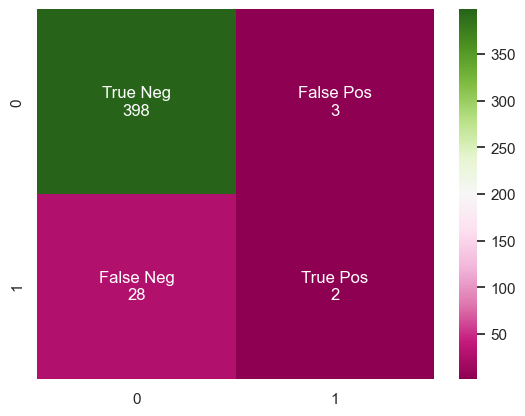

In [96]:
knn_confusion=confusion_matrix(y_test, y_pred_knn)

matrix_names = ['True Neg','False Pos','False Neg','True Pos']
matrix_counts = ['{0:0.0f}'.format(value) for value in
                knn_confusion.flatten()]
labels = [f'{v1}\n{v2}' for v1, v2 in
          zip(matrix_names,matrix_counts)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(knn_confusion, annot=labels, fmt='', cmap='PiYG')

print(classification_report(y_test, y_pred_knn, target_names=target_names))

## Random Forest HYPERPARAMETER TUNING

### RF fs SMOTE

In [65]:
# Grid search

rfc = RandomForestClassifier(random_state=42)

#epth = [3,5,7,9]
#stimators= np.arange(15,200,15)
#ax_features= ['sqrt','log2','None']

#aram_grid = dict(max_depth= depth, n_estimators=estimators, max_features=max_features)

grid_space={'max_depth':[3,5,10,None],
              'n_estimators':[10,100,200],
              'max_features':[1,3,5,7],
              'min_samples_leaf':[1,2,3],
              'min_samples_split':[1,2,3]
           }

#rint(param_grid)

grid = GridSearchCV(rfc, param_grid= grid_space, scoring='accuracy')

In [66]:
grid.fit(X_sm_fs, y_sm_fs)
print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)

0.9423080622775558
{'max_depth': None, 'max_features': 3, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
RandomForestClassifier(max_features=3, random_state=42)


In [67]:
best_rfc_sm_fs = RandomForestClassifier(max_features=3, random_state=42)
best_rfc_sm_fs.fit(X_sm_fs, y_sm_fs)
scores_best_rfc_sm_fs = cross_val_score(best_rfc_sm_fs, X_sm_fs, y_sm_fs, cv=10, scoring='accuracy')
print("Cross-Validation Accuracy:",scores_best_rfc_sm_fs.mean())

Cross-Validation Accuracy: 0.9454340038578121


In [68]:
# predicting test data
y_pred_rfc_sm_fs = best_rfc_sm_fs.predict(X_test_fs)
accuracy = accuracy_score(y_test, y_pred_rfc_sm_fs)
print("Test Accuracy:", accuracy)

Test Accuracy: 0.41067285382830626


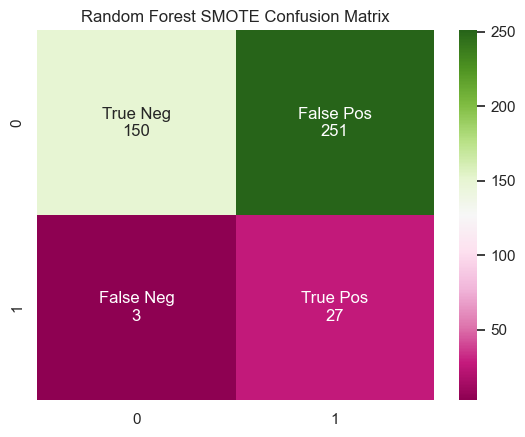

              precision    recall  f1-score   support

 0: Negative       0.98      0.37      0.54       401
 1: Positive       0.10      0.90      0.18        30

    accuracy                           0.41       431
   macro avg       0.54      0.64      0.36       431
weighted avg       0.92      0.41      0.52       431



In [73]:
rfc_confusion_hp_sm_fs=confusion_matrix(y_test, y_pred_rfc_sm_fs)
target_names = ['0: Negative', '1: Positive']
matrix_names = ['True Neg','False Pos','False Neg','True Pos']
matrix_counts = ['{0:0.0f}'.format(value) for value in
                rfc_confusion_hp_sm_fs.flatten()]
labels = [f'{v1}\n{v2}' for v1, v2 in
          zip(matrix_names,matrix_counts)]
labels = np.asarray(labels).reshape(2,2)

plt.figure()
sns.heatmap(rfc_confusion_hp_sm_fs, annot=labels, fmt='', cmap='PiYG')
plt.title('Random Forest SMOTE Confusion Matrix')
plt.savefig('Random Forest SMOTE Confusion Matrix', bbox_inches='tight')
plt.show()

print(classification_report(y_test, y_pred_rfc_sm_fs, target_names=target_names))

## RFC FS under 

In [71]:
rfc = RandomForestClassifier(random_state=42)

grid_space={'max_depth':[3,5,10,None],
              'n_estimators':[10,100,200],
              'max_features':[1,3,5,7],
              'min_samples_leaf':[1,2,3],
              'min_samples_split':[1,2,3]
           }

grid = GridSearchCV(rfc, param_grid= grid_space, scoring='accuracy')

In [72]:
grid.fit(X_under_fs, y_under_fs)
print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)

0.8142857142857143
{'max_depth': 3, 'max_features': 1, 'min_samples_leaf': 3, 'min_samples_split': 2, 'n_estimators': 100}
RandomForestClassifier(max_depth=3, max_features=1, min_samples_leaf=3,
                       random_state=42)


In [74]:
best_rfc_under_fs = RandomForestClassifier(max_depth=3, max_features=1, min_samples_leaf=3,
                       random_state=42)
best_rfc_under_fs.fit(X_under_fs, y_under_fs)
scores_best_rfc_under_fs = cross_val_score(best_rfc_under_fs, X_under_fs, y_under_fs, cv=10, scoring='accuracy')
print("Cross-Validation Accuracy:",scores_best_rfc_under_fs.mean())

# predicting test data
y_pred_rfc_under_fs = best_rfc_under_fs.predict(X_test_fs)
accuracy = accuracy_score(y_test, y_pred_rfc_under_fs)
print("Test Accuracy:", accuracy)

Cross-Validation Accuracy: 0.8036363636363635
Test Accuracy: 0.8700696055684455


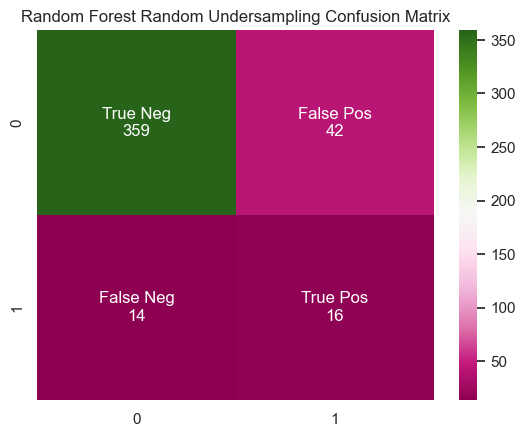

              precision    recall  f1-score   support

 0: Negative       0.96      0.90      0.93       401
 1: Positive       0.28      0.53      0.36        30

    accuracy                           0.87       431
   macro avg       0.62      0.71      0.65       431
weighted avg       0.91      0.87      0.89       431



In [75]:
rfc_confusion_hp_under_fs=confusion_matrix(y_test, y_pred_rfc_under_fs)

matrix_names = ['True Neg','False Pos','False Neg','True Pos']
matrix_counts = ['{0:0.0f}'.format(value) for value in
                rfc_confusion_hp_under_fs.flatten()]
labels = [f'{v1}\n{v2}' for v1, v2 in
          zip(matrix_names,matrix_counts)]
labels = np.asarray(labels).reshape(2,2)

plt.show()
sns.heatmap(rfc_confusion_hp_under_fs, annot=labels, fmt='', cmap='PiYG')
plt.title('Random Forest Random Undersampling Confusion Matrix')
plt.savefig('Random Forest Random Undersampling Confusion Matrix', bbox_inches='tight')
plt.show()

print(classification_report(y_test, y_pred_rfc_under_fs, target_names=target_names))

### RF on imbalanced dat 

In [76]:
rfc = RandomForestClassifier(random_state=42)

grid_space={'max_depth':[3,5,10,None],
              'n_estimators':[10,100,200],
              'max_features':[1,3,5,7],
              'min_samples_leaf':[1,2,3],
              'min_samples_split':[1,2,3]
           }

grid = GridSearchCV(rfc, param_grid= grid_space, scoring='accuracy')

In [77]:
grid.fit(X_train, y_train)
print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)

0.9711144278606966
{'max_depth': 3, 'max_features': 7, 'min_samples_leaf': 3, 'min_samples_split': 2, 'n_estimators': 100}
RandomForestClassifier(max_depth=3, max_features=7, min_samples_leaf=3,
                       random_state=42)


In [79]:
best_rfc_im = RandomForestClassifier(max_depth=3, max_features=7, min_samples_leaf=3,
                       random_state=42)
best_rfc_im.fit(X_train, y_train)
scores_best_rfc_im = cross_val_score(best_rfc_im, X_train, y_train, cv=10, scoring='accuracy')
print("Cross-Validation Accuracy:",scores_best_rfc_im.mean())

# predicting test data
y_predict_im_fs = best_rfc_im.predict(X_test)
accuracy = accuracy_score(y_test, y_predict_im_fs)
print("Test Accuracy:", accuracy)

Cross-Validation Accuracy: 0.9691485148514852
Test Accuracy: 0.9373549883990719


In [80]:
X_train.shape

(1004, 14)

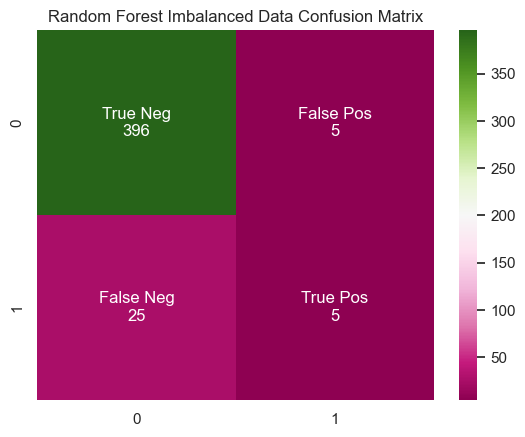

              precision    recall  f1-score   support

 0: Negative       0.94      0.99      0.96       401
 1: Positive       0.50      0.17      0.25        30

    accuracy                           0.93       431
   macro avg       0.72      0.58      0.61       431
weighted avg       0.91      0.93      0.91       431



In [96]:
rfc_confusion=confusion_matrix(y_test, y_predict)

matrix_names = ['True Neg','False Pos','False Neg','True Pos']
matrix_counts = ['{0:0.0f}'.format(value) for value in
                rfc_confusion.flatten()]
labels = [f'{v1}\n{v2}' for v1, v2 in
          zip(matrix_names,matrix_counts)]
labels = np.asarray(labels).reshape(2,2)

plt.figure()
sns.heatmap(rfc_confusion, annot=labels, fmt='', cmap='PiYG')
plt.title('Random Forest Imbalanced Data Confusion Matrix')
plt.savefig('Random Forest Imbalanced Data Confusion Matrix', bbox_inches='tight')
plt.show()

print(classification_report(y_test, y_predict, target_names=target_names))

## RF ALL SMOTE

In [81]:
rfc = RandomForestClassifier(random_state=42)

grid_space={'max_depth':[3,5,10,None],
              'n_estimators':[10,100,200],
              'max_features':[1,3,5,7],
              'min_samples_leaf':[1,2,3],
              'min_samples_split':[1,2,3]
           }

grid = GridSearchCV(rfc, param_grid= grid_space, scoring='accuracy')

In [82]:
grid.fit(X_sm, y_sm)
print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)

0.9853306949196796
{'max_depth': None, 'max_features': 1, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
RandomForestClassifier(max_features=1, random_state=42)


In [83]:
best_rfc_sm = RandomForestClassifier(max_features=1, random_state=42)
best_rfc_sm.fit(X_sm, y_sm)

scores_best_rfc_sm = cross_val_score(best_rfc_sm, X_sm, y_sm, cv=10, scoring='accuracy')
print("Cross-Validation Accuracy:",scores_best_rfc_sm.mean())

# predicting test data
y_pred_rfc_sm = best_rfc_sm.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_rfc_sm)
print("Test Accuracy:", accuracy)

Cross-Validation Accuracy: 0.9848057316065033
Test Accuracy: 0.8306264501160093


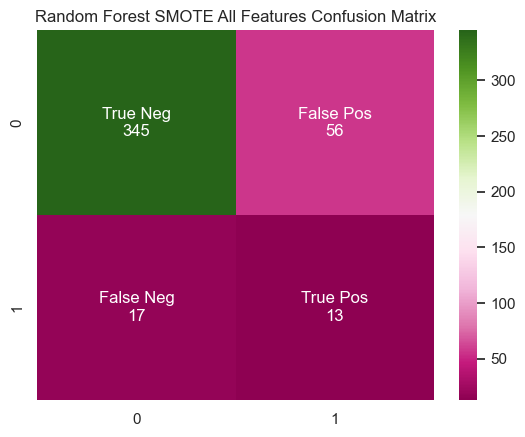

              precision    recall  f1-score   support

 0: Negative       0.95      0.86      0.90       401
 1: Positive       0.19      0.43      0.26        30

    accuracy                           0.83       431
   macro avg       0.57      0.65      0.58       431
weighted avg       0.90      0.83      0.86       431



In [84]:
rfc_confusion_hp_sm=confusion_matrix(y_test, y_pred_rfc_sm)

matrix_names = ['True Neg','False Pos','False Neg','True Pos']
matrix_counts = ['{0:0.0f}'.format(value) for value in
                rfc_confusion_hp_sm.flatten()]
labels = [f'{v1}\n{v2}' for v1, v2 in
          zip(matrix_names,matrix_counts)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(rfc_confusion_hp_sm, annot=labels, fmt='', cmap='PiYG')
plt.title('Random Forest SMOTE All Features Confusion Matrix')
plt.savefig('Random Forest SMOTE All Features', bbox_inches='tight')
plt.show()

print(classification_report(y_test, y_pred_rfc_sm, target_names=target_names))

### RFC ALL undersample

In [85]:
rfc = RandomForestClassifier(random_state=42)

grid_space={'max_depth':[3,5,10,None],
              'n_estimators':[10,100,200],
              'max_features':[1,3,5,7],
              'min_samples_leaf':[1,2,3],
              'min_samples_split':[1,2,3]
           }

grid = GridSearchCV(rfc, param_grid= grid_space, scoring='accuracy')

In [86]:
grid.fit(X_under, y_under)
print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)

0.8147619047619049
{'max_depth': 3, 'max_features': 7, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
RandomForestClassifier(max_depth=3, max_features=7, random_state=42)


In [87]:
best_rfc_under = RandomForestClassifier(max_depth=3, n_estimators=185, random_state=42)
best_rfc_under.fit(X_under, y_under)

scores_best_rfc_under = cross_val_score(best_rfc_under, X_under, y_under, cv=10, scoring='accuracy')
print("Cross-Validation Accuracy:",scores_best_rfc_under.mean())

# predicting test data
y_pred_rfc_under = best_rfc_under.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_rfc_under)
print("Test Accuracy:", accuracy)

Cross-Validation Accuracy: 0.7654545454545454
Test Accuracy: 0.8839907192575406


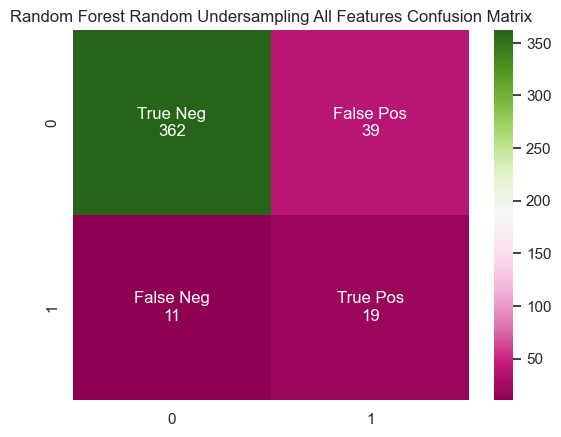

              precision    recall  f1-score   support

 0: Negative       0.97      0.90      0.94       401
 1: Positive       0.33      0.63      0.43        30

    accuracy                           0.88       431
   macro avg       0.65      0.77      0.68       431
weighted avg       0.93      0.88      0.90       431



In [88]:
rfc_confusion_hp_under=confusion_matrix(y_test, y_pred_rfc_under)

matrix_names = ['True Neg','False Pos','False Neg','True Pos']
matrix_counts = ['{0:0.0f}'.format(value) for value in
                rfc_confusion_hp_under.flatten()]
labels = [f'{v1}\n{v2}' for v1, v2 in
          zip(matrix_names,matrix_counts)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(rfc_confusion_hp_under, annot=labels, fmt='', cmap='PiYG')
plt.title('Random Forest Random Undersampling All Features Confusion Matrix')
plt.savefig('Random Forest Random Undersampling All Features', bbox_inches='tight')
plt.show()


print(classification_report(y_test, y_pred_rfc_under, target_names=target_names))

## RFC ALL imbalanced 

In [97]:
rfc = RandomForestClassifier(random_state=42)

depth = [3,5,7,9]
estimators= np.arange(50,200,15)

param_grid = dict(max_depth=depth, n_estimators=estimators)

print(param_grid)

grid = GridSearchCV(rfc, param_grid, cv=10, scoring='accuracy')

{'max_depth': [3, 5, 7, 9], 'n_estimators': array([ 50,  65,  80,  95, 110, 125, 140, 155, 170, 185])}


In [98]:
grid.fit(X_train, y_train)
print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)

0.9691287128712872
{'max_depth': 7, 'n_estimators': 155}
RandomForestClassifier(max_depth=7, n_estimators=155, random_state=42)


In [101]:
best_rfc = RandomForestClassifier(max_depth=7, n_estimators=155, random_state=42)
best_rfc.fit(X_train, y_train)

scores_best_rfc = cross_val_score(best_rfc, X_train, y_train, cv=10, scoring='accuracy')
print("Cross-Validation Accuracy:",scores_best_rfc.mean())

# predicting test data
y_pred_rfc = best_rfc.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_rfc)
print("Test Accuracy:", accuracy)

Cross-Validation Accuracy: 0.9691287128712872
Test Accuracy: 0.9303944315545244


              precision    recall  f1-score   support

 0: Negative       0.94      0.99      0.96       401
 1: Positive       0.50      0.17      0.25        30

    accuracy                           0.93       431
   macro avg       0.72      0.58      0.61       431
weighted avg       0.91      0.93      0.91       431



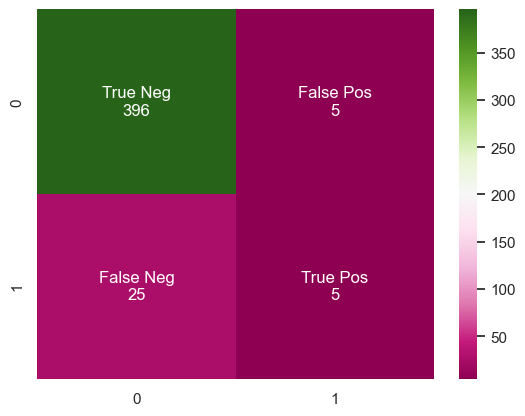

In [102]:
rfc_confusion=confusion_matrix(y_test, y_pred_rfc)

matrix_names = ['True Neg','False Pos','False Neg','True Pos']
matrix_counts = ['{0:0.0f}'.format(value) for value in
                rfc_confusion.flatten()]
labels = [f'{v1}\n{v2}' for v1, v2 in
          zip(matrix_names,matrix_counts)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(rfc_confusion, annot=labels, fmt='', cmap='PiYG')

print(classification_report(y_test, y_pred_rfc, target_names=target_names))

## Logistic regression PARAMETER TUNING 

### FS SMOTE

In [146]:
lr =LogisticRegression(random_state=42)
penalty = ['l2','l1','None']
regulisation_strength = [1, 10, 100, 1000]
solver= ['liblinear', 'lbfgs', 'newton-cg', 'sag', 'saga']
iteration = [500,1000]

param_grid = dict(penalty=penalty, solver=solver, max_iter = iteration, C=regulisation_strength)

print(param_grid)
grid = GridSearchCV(lr, param_grid, cv=5, scoring='accuracy')

{'penalty': ['l2', 'l1', 'None'], 'solver': ['liblinear', 'lbfgs', 'newton-cg', 'sag', 'saga'], 'max_iter': [500, 1000], 'C': [1, 10, 100, 1000]}


In [147]:
grid.fit(X_sm_fs, y_sm_fs)
print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)

0.8111239367330393
{'C': 1, 'max_iter': 500, 'penalty': 'l2', 'solver': 'liblinear'}
LogisticRegression(C=1, max_iter=500, random_state=42, solver='liblinear')


In [148]:
best_lr_sm_fs = LogisticRegression(C=1, max_iter=500, random_state=42, solver='liblinear')
best_lr_sm_fs.fit(X_sm_fs, y_sm_fs)
scores_best_lr_sm_fs = cross_val_score(best_lr_sm_fs, X_sm_fs, y_sm_fs, cv=10, scoring='accuracy')
print("Cross-Validation Accuracy:",scores_best_lr_sm_fs.mean())

Cross-Validation Accuracy: 0.811143565720584


In [149]:
# predicting test data
y_pred_lr_sm_fs = best_lr_sm_fs.predict(X_test_fs)
accuracy = accuracy_score(y_test, y_pred_lr_sm_fs)
print("Test Accuracy:", accuracy)

Test Accuracy: 0.8259860788863109


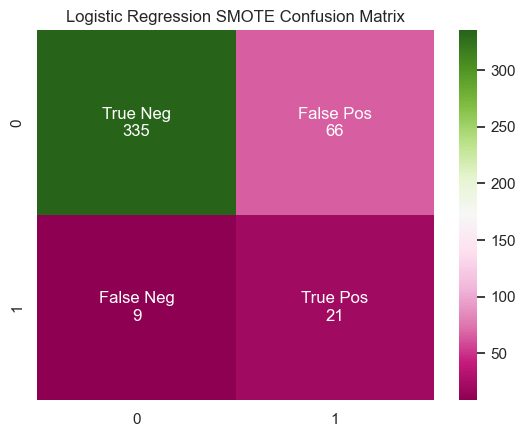

              precision    recall  f1-score   support

 0: Negative       0.97      0.84      0.90       401
 1: Positive       0.24      0.70      0.36        30

    accuracy                           0.83       431
   macro avg       0.61      0.77      0.63       431
weighted avg       0.92      0.83      0.86       431



In [103]:
lr_confusion_hp_sm_fs=confusion_matrix(y_test, y_pred_lr_sm_fs)

matrix_names = ['True Neg','False Pos','False Neg','True Pos']
matrix_counts = ['{0:0.0f}'.format(value) for value in
                lr_confusion_hp_sm_fs.flatten()]
labels = [f'{v1}\n{v2}' for v1, v2 in
          zip(matrix_names,matrix_counts)]
labels = np.asarray(labels).reshape(2,2)

plt.figure()
sns.heatmap(lr_confusion_hp_sm_fs, annot=labels, fmt='', cmap='PiYG')
plt.title('Logistic Regression SMOTE Confusion Matrix')
plt.savefig('Logistic Regression SMOTE Confusion Matrix', bbox_inches='tight')
plt.show()

print(classification_report(y_test, y_pred_lr_sm_fs, target_names=target_names))

In [ ]:
# Logistic regression SMOTE
y_pred = best_lr_sm_fs.predict_proba(X_test_fs)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
auc = round(metrics.roc_auc_score(y_test, y_pred), 4)
plt.plot(fpr,tpr,label="LOGISTIC REGRESSION SMOTE, AUC="+str(auc))

### LR fs undersampling 

In [150]:
lr =LogisticRegression(random_state=42)
penalty = ['l2','l1','None']
regulisation_strength = [1, 10, 100, 1000]
solver= ['liblinear', 'lbfgs', 'newton-cg', 'sag', 'saga']
iteration = [500,1000]

param_grid = dict(penalty=penalty, solver=solver, max_iter = iteration, C=regulisation_strength)

print(param_grid)
grid = GridSearchCV(lr, param_grid, cv=5, scoring='accuracy')

{'penalty': ['l2', 'l1', 'None'], 'solver': ['liblinear', 'lbfgs', 'newton-cg', 'sag', 'saga'], 'max_iter': [500, 1000], 'C': [1, 10, 100, 1000]}


In [151]:
grid.fit(X_under_fs, y_under_fs)
print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)

0.8138095238095238
{'C': 1, 'max_iter': 500, 'penalty': 'l2', 'solver': 'liblinear'}
LogisticRegression(C=1, max_iter=500, random_state=42, solver='liblinear')


In [152]:
best_lr_under_fs = LogisticRegression(C=1, max_iter=500, penalty='l1', random_state=42,
                   solver='saga')
best_lr_under_fs.fit(X_under_fs, y_under_fs)
scores_best_lr_under_fs = cross_val_score(best_lr_under_fs, X_under_fs, y_under_fs, cv=10, scoring='accuracy')
print("Cross-Validation Accuracy:",scores_best_lr_under_fs.mean())

Cross-Validation Accuracy: 0.7936363636363637


In [152]:
# predicting test data
y_pred_lr_under_fs = best_lr_under_fs.predict(X_test_fs)
accuracy = accuracy_score(y_test, y_pred_lr_under_fs)
print("Test Accuracy:", accuracy)

Test Accuracy: 0.8538283062645011


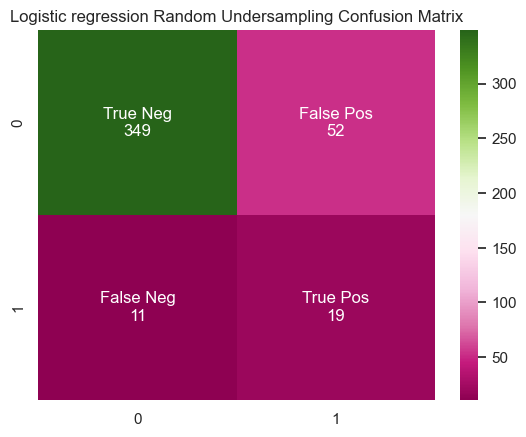

              precision    recall  f1-score   support

 0: Negative       0.97      0.87      0.92       401
 1: Positive       0.27      0.63      0.38        30

    accuracy                           0.85       431
   macro avg       0.62      0.75      0.65       431
weighted avg       0.92      0.85      0.88       431



In [153]:
lr_confusion_hp_under_fs=confusion_matrix(y_test, y_pred_lr_under_fs)

matrix_names = ['True Neg','False Pos','False Neg','True Pos']
matrix_counts = ['{0:0.0f}'.format(value) for value in
                lr_confusion_hp_under_fs.flatten()]
labels = [f'{v1}\n{v2}' for v1, v2 in
          zip(matrix_names,matrix_counts)]
labels = np.asarray(labels).reshape(2,2)

plt.figure()
sns.heatmap(lr_confusion_hp_under_fs, annot=labels, fmt='', cmap='PiYG')
plt.title('Logistic regression Random Undersampling Confusion Matrix')
plt.savefig('Logistic Regressio random Undersampling Confusion Matrix', bbox_inches='tight')
plt.show()

print(classification_report(y_test, y_pred_lr_under_fs, target_names=target_names))

### LR imbalanced data

In [154]:
lr =LogisticRegression(random_state=42)
penalty = ['l2','l1','None']
regulisation_strength = [1, 10, 100, 1000]
solver= ['liblinear', 'lbfgs', 'newton-cg', 'sag', 'saga']
iteration = [500,1000]

param_grid = dict(penalty=penalty, solver=solver, max_iter = iteration, C=regulisation_strength)

print(param_grid)
grid = GridSearchCV(lr, param_grid, cv=5, scoring='accuracy')

{'penalty': ['l2', 'l1', 'None'], 'solver': ['liblinear', 'lbfgs', 'newton-cg', 'sag', 'saga'], 'max_iter': [500, 1000], 'C': [1, 10, 100, 1000]}


In [155]:
grid.fit(X_train, y_train)
print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)

0.9561641791044776
{'C': 1, 'max_iter': 500, 'penalty': 'l2', 'solver': 'liblinear'}
LogisticRegression(C=1, max_iter=500, random_state=42, solver='liblinear')


In [156]:
best_lr_im = LogisticRegression(C=1, max_iter=500, random_state=42, solver='liblinear')
best_lr_im.fit(X_train, y_train)
scores_best_lr_im = cross_val_score(best_lr_im, X_train, y_train, cv=10, scoring='accuracy')
print("Cross-Validation Accuracy:",scores_best_lr_im.mean())

Cross-Validation Accuracy: 0.957178217821782


In [157]:
y_predict = best_lr_im.predict(X_test)
accuracy = accuracy_score(y_test, y_predict)
print("Test Accuracy:", accuracy)

Test Accuracy: 0.9303944315545244


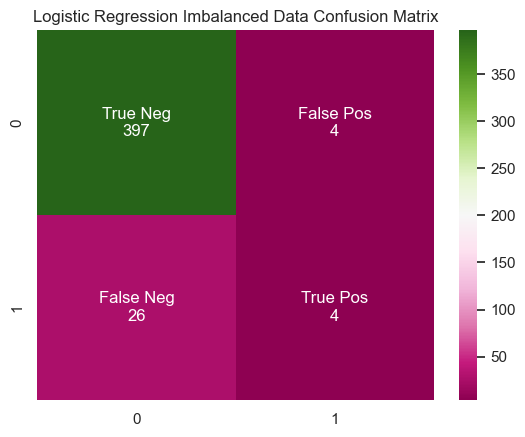

              precision    recall  f1-score   support

 0: Negative       0.94      0.99      0.96       401
 1: Positive       0.50      0.13      0.21        30

    accuracy                           0.93       431
   macro avg       0.72      0.56      0.59       431
weighted avg       0.91      0.93      0.91       431



In [115]:
lr_confusion=confusion_matrix(y_test, y_predict)

matrix_names = ['True Neg','False Pos','False Neg','True Pos']
matrix_counts = ['{0:0.0f}'.format(value) for value in
                lr_confusion.flatten()]
labels = [f'{v1}\n{v2}' for v1, v2 in
          zip(matrix_names,matrix_counts)]
labels = np.asarray(labels).reshape(2,2)

plt.figure()
sns.heatmap(lr_confusion, annot=labels, fmt='', cmap='PiYG')
plt.title('Logistic Regression Imbalanced Data Confusion Matrix')
plt.savefig('Logistic Regression Imbalanced Data Confusion Matrix', bbox_inches='tight')
plt.show()

print(classification_report(y_test, y_predict, target_names=target_names))

### LR ALL SMOTE

In [92]:
lr =LogisticRegression(random_state=42)
penalty = ['l2','l1','None']
regulisation_strength = [1, 10, 100, 1000]
solver= ['liblinear', 'lbfgs', 'newton-cg', 'sag', 'saga']
iteration = [500,1000]

param_grid = dict(penalty=penalty, solver=solver, max_iter = iteration, C=regulisation_strength)

print(param_grid)
grid = GridSearchCV(lr, param_grid, cv=5, scoring='accuracy')

grid.fit(X_sm, y_sm)
print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)

{'penalty': ['l2', 'l1', 'None'], 'solver': ['liblinear', 'lbfgs', 'newton-cg', 'sag', 'saga'], 'max_iter': [500, 1000], 'C': [1, 10, 100, 1000]}
0.8158552170507483
{'C': 10, 'max_iter': 500, 'penalty': 'l2', 'solver': 'liblinear'}
LogisticRegression(C=10, max_iter=500, random_state=42, solver='liblinear')


In [93]:
best_lr_sm = LogisticRegression(C=10, max_iter=500, random_state=42,
                   solver='liblinear')
best_lr_sm.fit(X_sm, y_sm)

scores_best_lr_sm = cross_val_score(best_lr_sm, X_sm, y_sm, cv=10, scoring='accuracy')
print("Cross-Validation Accuracy:",scores_best_lr_sm.mean())

# predicting test data
y_pred_lr_sm = best_lr_sm.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_lr_sm)
print("Test Accuracy:", accuracy)

Cross-Validation Accuracy: 0.8147919537062551
Test Accuracy: 0.7958236658932715


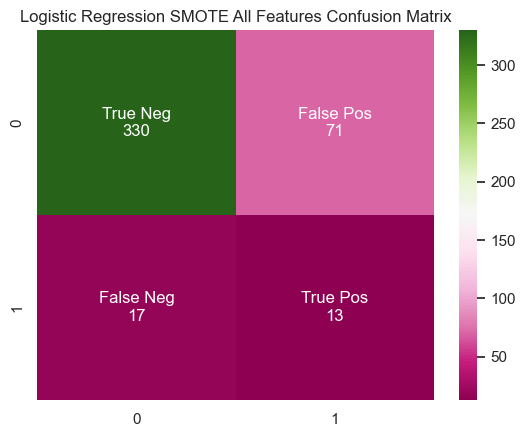

              precision    recall  f1-score   support

 0: Negative       0.95      0.82      0.88       401
 1: Positive       0.15      0.43      0.23        30

    accuracy                           0.80       431
   macro avg       0.55      0.63      0.56       431
weighted avg       0.90      0.80      0.84       431



In [179]:
lr_confusion_hp_sm=confusion_matrix(y_test, y_pred_lr_sm)

plt.figure()
matrix_names = ['True Neg','False Pos','False Neg','True Pos']
matrix_counts = ['{0:0.0f}'.format(value) for value in
                lr_confusion_hp_sm.flatten()]
labels = [f'{v1}\n{v2}' for v1, v2 in
          zip(matrix_names,matrix_counts)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(lr_confusion_hp_sm, annot=labels, fmt='', cmap='PiYG')
plt.title('Logistic Regression SMOTE All Features Confusion Matrix')
plt.savefig('Logistic Regression SMOTE All Features Confusion Matrix', bbox_inches='tight')
plt.show()



print(classification_report(y_test, y_pred_lr_sm, target_names=target_names))


### LR ALL Undersampling 

In [94]:
lr =LogisticRegression(random_state=42)
penalty = ['l2','l1','None']
regulisation_strength = [1, 10, 100, 1000]
solver= ['liblinear', 'lbfgs', 'newton-cg', 'sag', 'saga']
iteration = [500,1000]

param_grid = dict(penalty=penalty, solver=solver, max_iter = iteration, C=regulisation_strength)

print(param_grid)
grid = GridSearchCV(lr, param_grid, cv=5, scoring='accuracy')

grid.fit(X_under, y_under)
print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)

{'penalty': ['l2', 'l1', 'None'], 'solver': ['liblinear', 'lbfgs', 'newton-cg', 'sag', 'saga'], 'max_iter': [500, 1000], 'C': [1, 10, 100, 1000]}
0.7157142857142856
{'C': 1, 'max_iter': 500, 'penalty': 'l2', 'solver': 'liblinear'}
LogisticRegression(C=1, max_iter=500, random_state=42, solver='liblinear')


In [95]:
best_lr_under = LogisticRegression(C=1, max_iter=500, random_state=42,
                   solver='saga')
best_lr_under.fit(X_under, y_under)

scores_best_lr_under = cross_val_score(best_lr_under, X_under, y_under, cv=10, scoring='accuracy')
print("Cross-Validation Accuracy:",scores_best_lr_under.mean())

# predicting test data
y_pred_lr_under = best_lr_under.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_lr_under)
print("Test Accuracy:", accuracy)

Cross-Validation Accuracy: 0.7154545454545455
Test Accuracy: 0.8283062645011601


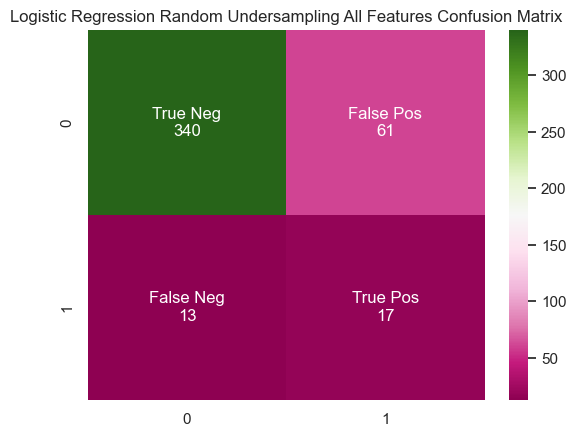

              precision    recall  f1-score   support

 0: Negative       0.96      0.85      0.90       401
 1: Positive       0.22      0.57      0.31        30

    accuracy                           0.83       431
   macro avg       0.59      0.71      0.61       431
weighted avg       0.91      0.83      0.86       431



In [96]:
lr_confusion_hp_under=confusion_matrix(y_test, y_pred_lr_under)

plt.figure()
matrix_names = ['True Neg','False Pos','False Neg','True Pos']
matrix_counts = ['{0:0.0f}'.format(value) for value in
                lr_confusion_hp_under.flatten()]
labels = [f'{v1}\n{v2}' for v1, v2 in
          zip(matrix_names,matrix_counts)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(lr_confusion_hp_under, annot=labels, fmt='', cmap='PiYG')
plt.title('Logistic Regression Random Undersampling All Features Confusion Matrix')
plt.savefig('Logistic Regression Random Sampling All Features', bbox_inches='tight')
plt.show()

print(classification_report(y_test, y_pred_lr_under, target_names=target_names))

### LR imblanced ALL

In [103]:
lr =LogisticRegression(random_state=42)
penalty = ['l2','l1','None']
regulisation_strength = [1, 10, 100, 1000]
solver= ['liblinear', 'lbfgs', 'newton-cg', 'sag', 'saga']
iteration = [500,1000]

param_grid = dict(penalty=penalty, solver=solver, max_iter = iteration, C=regulisation_strength)

print(param_grid)
grid = GridSearchCV(lr, param_grid, cv=5, scoring='accuracy')

grid.fit(X_under, y_under)
print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)

{'penalty': ['l2', 'l1', 'None'], 'solver': ['liblinear', 'lbfgs', 'newton-cg', 'sag', 'saga'], 'max_iter': [500, 1000], 'C': [1, 10, 100, 1000]}
0.7371428571428572
{'C': 1, 'max_iter': 500, 'penalty': 'l2', 'solver': 'lbfgs'}
LogisticRegression(C=1, max_iter=500, random_state=42)


In [104]:
best_lr = LogisticRegression(C=1, max_iter=500, random_state=42)
best_lr.fit(X_train, y_train)

scores_best_lr = cross_val_score(best_lr, X_train, y_train, cv=10, scoring='accuracy')
print("Cross-Validation Accuracy:",scores_best_lr.mean())

# predicting test data
y_pred_lr = best_lr.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_lr)
print("Test Accuracy:", accuracy)

Cross-Validation Accuracy: 0.9551881188118811
Test Accuracy: 0.9303944315545244


              precision    recall  f1-score   support

 0: Negative       0.94      0.99      0.96       401
 1: Positive       0.50      0.13      0.21        30

    accuracy                           0.93       431
   macro avg       0.72      0.56      0.59       431
weighted avg       0.91      0.93      0.91       431



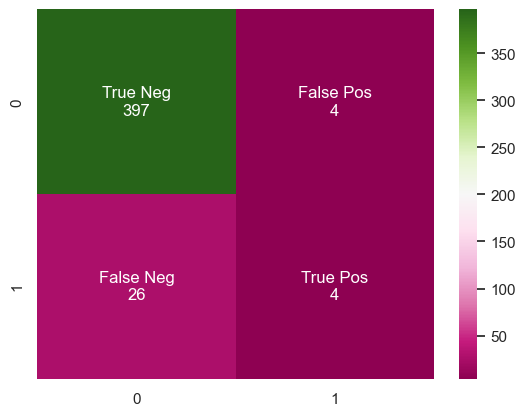

In [105]:
lr_confusion=confusion_matrix(y_test, y_pred_lr)

matrix_names = ['True Neg','False Pos','False Neg','True Pos']
matrix_counts = ['{0:0.0f}'.format(value) for value in
                lr_confusion.flatten()]
labels = [f'{v1}\n{v2}' for v1, v2 in
          zip(matrix_names,matrix_counts)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(lr_confusion, annot=labels, fmt='', cmap='PiYG')

print(classification_report(y_test, y_pred_lr, target_names=target_names))

## ADABOOSTING

In [105]:
sklearn.ensemble.AdaBoostClassifier

sklearn.ensemble._weight_boosting.AdaBoostClassifier

In [107]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

In [174]:
classifier = AdaBoostClassifier(
    RandomForestClassifier(max_depth=1),
           n_estimators=100,
           learning_rate=0.5,
           random_state=42)

Cross-Validation Accuracy: 0.852573140399335
Test Accuracy: 0.6844547563805105


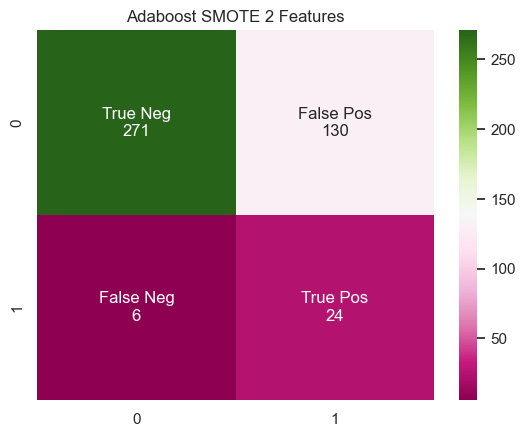

In [175]:
# SMOTE 2 features 
ada_sm_fs = classifier.fit(X_sm_fs, y_sm_fs)

scores_best = cross_val_score(ada_sm_fs, X_sm_fs, y_sm_fs, cv=5, scoring='accuracy')
print("Cross-Validation Accuracy:",scores_best.mean())

# predicting test data
y_pred = classifier.predict(X_test_fs)
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", accuracy)

ada_sm_fs_confusion =confusion_matrix(y_test, y_pred)

matrix_names = ['True Neg','False Pos','False Neg','True Pos']
matrix_counts = ['{0:0.0f}'.format(value) for value in
                ada_sm_fs_confusion.flatten()]
labels = [f'{v1}\n{v2}' for v1, v2 in
          zip(matrix_names,matrix_counts)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(ada_sm_fs_confusion, annot=labels, fmt='', cmap='PiYG')
plt.title('Adaboost SMOTE 2 Features')
plt.savefig('Adaboost SMOTE 2 Features', bbox_inches='tight')
plt.show()

Cross-Validation Accuracy: 0.8138095238095238
Test Accuracy: 0.8167053364269141


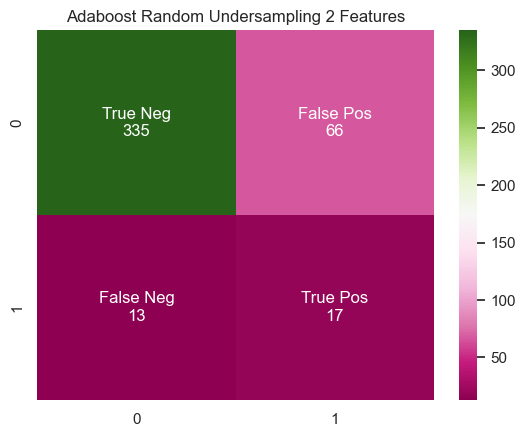

In [177]:
# random undersampling Feature selction 

ada_under_fs = classifier.fit(X_under_fs, y_under_fs)

scores_best = cross_val_score(ada_under_fs, X_under_fs, y_under_fs, cv=5, scoring='accuracy')
print("Cross-Validation Accuracy:",scores_best.mean())

# predicting test data
y_pred = classifier.predict(X_test_fs)
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", accuracy)

ada_under_fs_confusion =confusion_matrix(y_test, y_pred)

matrix_names = ['True Neg','False Pos','False Neg','True Pos']
matrix_counts = ['{0:0.0f}'.format(value) for value in
                ada_under_fs_confusion.flatten()]
labels = [f'{v1}\n{v2}' for v1, v2 in
          zip(matrix_names,matrix_counts)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(ada_under_fs_confusion, annot=labels, fmt='', cmap='PiYG')
plt.title('Adaboost Random Undersampling 2 Features')
plt.savefig('Adaboost Random Undersampling 2 Features', bbox_inches='tight')
plt.show()

Cross-Validation Accuracy: 0.9617320086298113
Test Accuracy: 0.3990719257540603


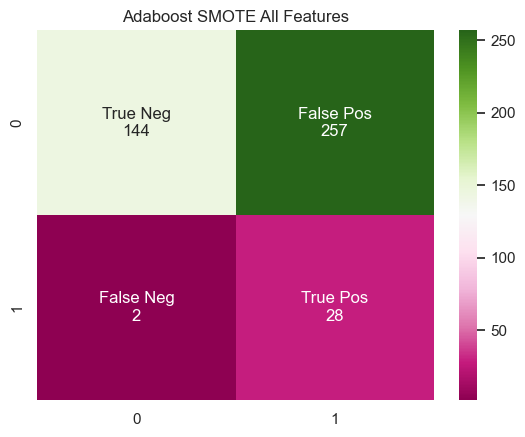

In [178]:
## smote All FEATURES 

ada_sm = classifier.fit(X_sm, y_sm)

scores_best = cross_val_score(ada_sm, X_sm, y_sm, cv=5, scoring='accuracy')
print("Cross-Validation Accuracy:",scores_best.mean())

# predicting test data
y_pred = classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", accuracy)

ada_sm_confusion =confusion_matrix(y_test, y_pred)

matrix_names = ['True Neg','False Pos','False Neg','True Pos']
matrix_counts = ['{0:0.0f}'.format(value) for value in
                ada_sm_confusion.flatten()]
labels = [f'{v1}\n{v2}' for v1, v2 in
          zip(matrix_names,matrix_counts)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(ada_sm_confusion, annot=labels, fmt='', cmap='PiYG')
plt.title('Adaboost SMOTE All Features')
plt.savefig('Adaboost SMOTE All Features', bbox_inches='tight')
plt.show()

Cross-Validation Accuracy: 0.6580952380952381
Test Accuracy: 0.7447795823665894


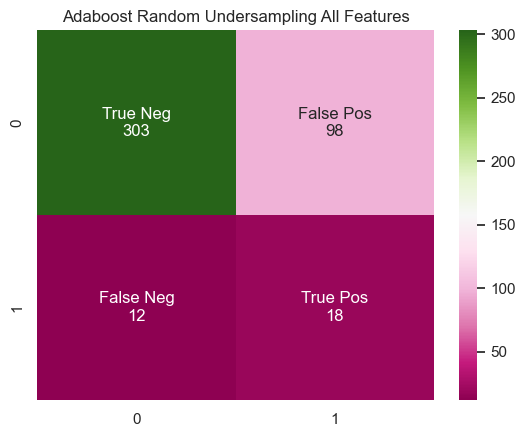

In [179]:
# random under sampling ALL features 
ada_under = classifier.fit(X_under, y_under)

scores_best = cross_val_score(ada_under, X_under, y_under, cv=5, scoring='accuracy')
print("Cross-Validation Accuracy:",scores_best.mean())

# predicting test data
y_pred = classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", accuracy)

ada_under_confusion =confusion_matrix(y_test, y_pred)

matrix_names = ['True Neg','False Pos','False Neg','True Pos']
matrix_counts = ['{0:0.0f}'.format(value) for value in
                ada_under_confusion.flatten()]
labels = [f'{v1}\n{v2}' for v1, v2 in
          zip(matrix_names,matrix_counts)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(ada_under_confusion, annot=labels, fmt='', cmap='PiYG')
plt.title('Adaboost Random Undersampling All Features')
plt.savefig('Adaboost Random Undersampling All Features', bbox_inches='tight')
plt.show()


Cross-Validation Accuracy: 0.9561691542288557
Test Accuracy: 0.925754060324826


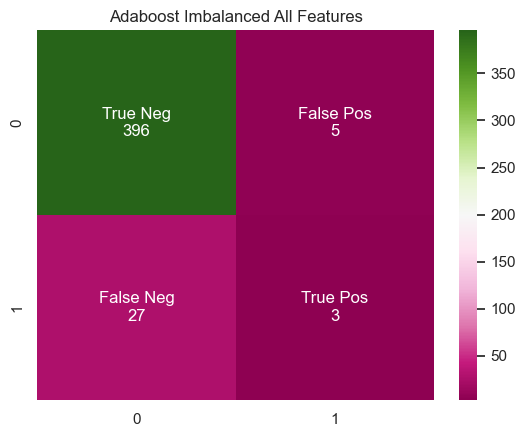

In [180]:
# imbalanced data

ada_im = classifier.fit(X_train, y_train)

scores_best = cross_val_score(ada_im, X_train, y_train, cv=5, scoring='accuracy')
print("Cross-Validation Accuracy:",scores_best.mean())

# predicting test data
y_pred = classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", accuracy)

ada_im_confusion =confusion_matrix(y_test, y_pred)

matrix_names = ['True Neg','False Pos','False Neg','True Pos']
matrix_counts = ['{0:0.0f}'.format(value) for value in
                ada_im_confusion.flatten()]
labels = [f'{v1}\n{v2}' for v1, v2 in
          zip(matrix_names,matrix_counts)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(ada_im_confusion, annot=labels, fmt='', cmap='PiYG')
plt.title('Adaboost Imbalanced All Features')
plt.savefig('Adaboost Imbalanced All Features', bbox_inches='tight')
plt.show()

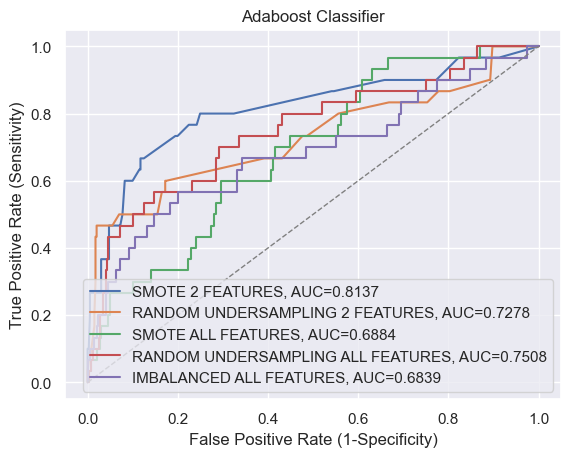

In [182]:
# roc curve ada boost decision tree

plt.figure(0).clf()
ada_sm_fs = classifier.fit(X_sm_fs, y_sm_fs)
y_pred = ada_sm_fs.predict_proba(X_test_fs)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
auc = round(metrics.roc_auc_score(y_test, y_pred), 4)
plt.plot(fpr,tpr,label="SMOTE 2 FEATURES, AUC="+str(auc))

ada_under_fs = classifier.fit(X_under_fs, y_under_fs)
y_pred = ada_under_fs.predict_proba(X_test_fs)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
auc = round(metrics.roc_auc_score(y_test, y_pred), 4)
plt.plot(fpr,tpr,label="RANDOM UNDERSAMPLING 2 FEATURES, AUC="+str(auc))

ada_sm = classifier.fit(X_sm, y_sm)
y_pred = ada_sm.predict_proba(X_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
auc = round(metrics.roc_auc_score(y_test, y_pred), 4)
plt.plot(fpr,tpr,label="SMOTE ALL FEATURES, AUC="+str(auc))

ada_under = classifier.fit(X_under, y_under)
y_pred = ada_under.predict_proba(X_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
auc = round(metrics.roc_auc_score(y_test, y_pred), 4)
plt.plot(fpr,tpr,label="RANDOM UNDERSAMPLING ALL FEATURES, AUC="+str(auc))

ada_im = classifier.fit(X_train, y_train)
y_pred = ada_im.predict_proba(X_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
auc = round(metrics.roc_auc_score(y_test, y_pred), 4)
plt.plot(fpr,tpr,label="IMBALANCED ALL FEATURES, AUC="+str(auc))

plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')

plt.title('Adaboost Classifier')
plt.legend(loc='lower right')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.xlabel('False Positive Rate (1-Specificity)')
plt.savefig('Adaboost Classifier', bbox_inches='tight')
plt.show()

Cross-Validation Accuracy: 0.7454545454545455
Test Accuracy: 0.802784222737819


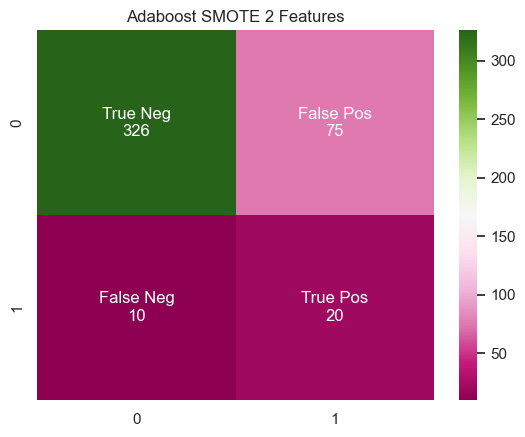

In [164]:
ada_lr = AdaBoostClassifier(base_estimator= RandomForestClassifier(max_features=1), n_estimators=50, random_state=42)

# ada lr under all features 
ada_lr_under = ada_lr.fit(X_under, y_under)

scores_best = cross_val_score(ada_lr, X_under, y_under, cv=10, scoring='accuracy')
print("Cross-Validation Accuracy:",scores_best.mean())

# predicting test data
y_pred = ada_lr_under.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", accuracy)

ada_lr_under_confusion =confusion_matrix(y_test, y_pred)

matrix_names = ['True Neg','False Pos','False Neg','True Pos']
matrix_counts = ['{0:0.0f}'.format(value) for value in
                ada_lr_under_confusion.flatten()]
labels = [f'{v1}\n{v2}' for v1, v2 in
          zip(matrix_names,matrix_counts)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(ada_lr_under_confusion, annot=labels, fmt='', cmap='PiYG')
plt.title('Adaboost SMOTE 2 Features')
plt.savefig('Adaboost SMOTE 2 Features', bbox_inches='tight')
plt.show()

### ROC graphs

In [122]:
from sklearn import metrics
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
import numpy as np
import matplotlib.pyplot as plt

#  https://www.statology.org/plot-multiple-roc-curves-python/ 

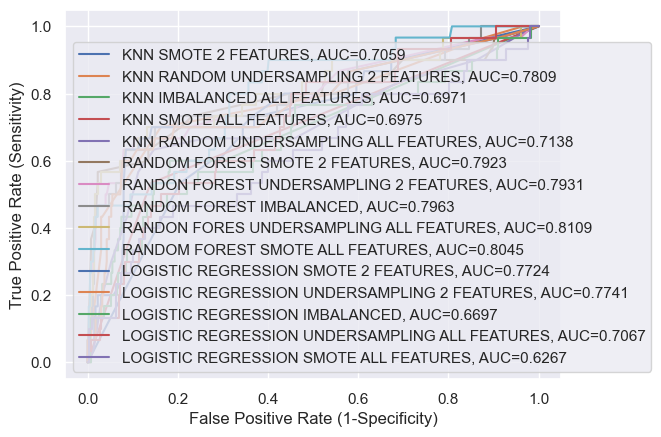

In [158]:
plt.figure(0).clf()

# KNN SMOTE FS 2
y_pred = best_knn_fs_sm.predict_proba(X_test_fs)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
auc = round(metrics.roc_auc_score(y_test, y_pred), 4)
plt.plot(fpr,tpr,label="KNN SMOTE 2 FEATURES, AUC="+str(auc))

#KNN FS UNDERSAMPLING 
y_pred = best_knn_fs_under.predict_proba(X_test_fs)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
auc = round(metrics.roc_auc_score(y_test, y_pred), 4)
plt.plot(fpr,tpr,label="KNN RANDOM UNDERSAMPLING 2 FEATURES, AUC="+str(auc))

# KNN on imbalanced data fs
y_pred = best_knn_im.predict_proba(X_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
auc = round(metrics.roc_auc_score(y_test, y_pred), 4)
plt.plot(fpr,tpr,label="KNN IMBALANCED ALL FEATURES, AUC="+str(auc))

########

# KNN SMOTE ALL FEATURES
y_pred = best_knn_sm.predict_proba(X_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
auc = round(metrics.roc_auc_score(y_test, y_pred), 4)
plt.plot(fpr,tpr,label="KNN SMOTE ALL FEATURES, AUC="+str(auc))

#KNN FS UNDERSAMPLING ALL FEATURES
y_pred = best_knn_under.predict_proba(X_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
auc = round(metrics.roc_auc_score(y_test, y_pred), 4)
plt.plot(fpr,tpr,label="KNN RANDOM UNDERSAMPLING ALL FEATURES, AUC="+str(auc))

######

# Random Forest smote fs
y_pred = best_rfc_sm_fs.predict_proba(X_test_fs)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
auc = round(metrics.roc_auc_score(y_test, y_pred), 4)
plt.plot(fpr,tpr,label="RANDOM FOREST SMOTE 2 FEATURES, AUC="+str(auc))

#Random Forest random undersampling fs
y_pred = best_rfc_under_fs.predict_proba(X_test_fs)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
auc = round(metrics.roc_auc_score(y_test, y_pred), 4)
plt.plot(fpr,tpr,label="RANDON FOREST UNDERSAMPLING 2 FEATURES, AUC="+str(auc))

# Random forest imbalced data
y_pred = best_rfc_im.predict_proba(X_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
auc = round(metrics.roc_auc_score(y_test, y_pred), 4)
plt.plot(fpr,tpr,label="RANDOM FOREST IMBALANCED, AUC="+str(auc))

#############
#Random Forest random undersampling ALL FEATURES
y_pred = best_rfc_under.predict_proba(X_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
auc = round(metrics.roc_auc_score(y_test, y_pred), 4)
plt.plot(fpr,tpr,label="RANDON FORES UNDERSAMPLING ALL FEATURES, AUC="+str(auc))


# Random Forest smote ALL FEATURES
y_pred = best_rfc_sm.predict_proba(X_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
auc = round(metrics.roc_auc_score(y_test, y_pred), 4)
plt.plot(fpr,tpr,label="RANDOM FOREST SMOTE ALL FEATURES, AUC="+str(auc))

###############

# Logistic regression SMOTE fs
y_pred = best_lr_sm_fs.predict_proba(X_test_fs)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
auc = round(metrics.roc_auc_score(y_test, y_pred), 4)
plt.plot(fpr,tpr,label="LOGISTIC REGRESSION SMOTE 2 FEATURES, AUC="+str(auc))

#logistic regression undersampling fs
y_pred = best_lr_under_fs.predict_proba(X_test_fs)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
auc = round(metrics.roc_auc_score(y_test, y_pred), 4)
plt.plot(fpr,tpr,label="LOGISTIC REGRESSION UNDERSAMPLING 2 FEATURES, AUC="+str(auc))

# Logistic regression imbalanced data 
y_pred = best_lr_im.predict_proba(X_test)[:, 1]
fpr, tpr, _= metrics.roc_curve(y_test, y_pred)
auc = round(metrics.roc_auc_score(y_test, y_pred), 4)
plt.plot(fpr,tpr,label="LOGISTIC REGRESSION IMBALANCED, AUC="+str(auc))

####

# random undersampling logistic regression all feature
y_pred = best_lr_under.predict_proba(X_test)[:, 1]
fpr, tpr, _= metrics.roc_curve(y_test, y_pred)
auc = round(metrics.roc_auc_score(y_test, y_pred), 4)
plt.plot(fpr,tpr,label="LOGISTIC REGRESSION UNDERSAMPLING ALL FEATURES, AUC="+str(auc))

#logistic regression all smaples SMOTE
y_pred = best_lr_sm.predict_proba(X_test)[:, 1]
fpr, tpr, _= metrics.roc_curve(y_test, y_pred)
auc = round(metrics.roc_auc_score(y_test, y_pred), 4)
plt.plot(fpr,tpr,label="LOGISTIC REGRESSION SMOTE ALL FEATURES, AUC="+str(auc))

#add legend
plt.legend()
plt.ylabel('True Positive Rate (Sensitivity)')
plt.xlabel('False Positive Rate (1-Specificity)')
plt.show()

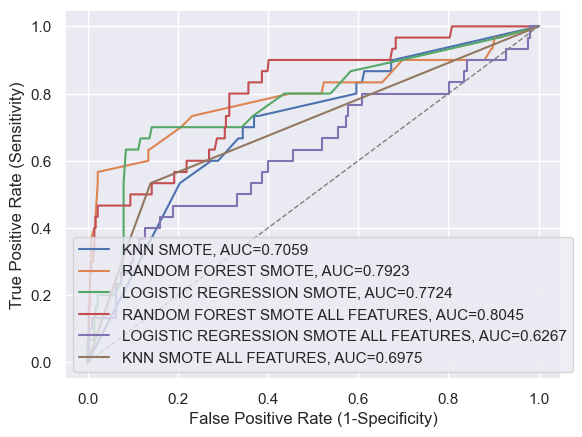

In [160]:
plt.figure(0).clf()
# KNN SMOTE FS
y_pred = best_knn_fs_sm.predict_proba(X_test_fs)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
auc = round(metrics.roc_auc_score(y_test, y_pred), 4)
plt.plot(fpr,tpr,label="KNN SMOTE, AUC="+str(auc))
# Random Forest smote
y_pred = best_rfc_sm_fs.predict_proba(X_test_fs)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
auc = round(metrics.roc_auc_score(y_test, y_pred), 4)
plt.plot(fpr,tpr,label="RANDOM FOREST SMOTE, AUC="+str(auc))
# Logistic regression SMOTE
y_pred = best_lr_sm_fs.predict_proba(X_test_fs)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
auc = round(metrics.roc_auc_score(y_test, y_pred), 4)
plt.plot(fpr,tpr,label="LOGISTIC REGRESSION SMOTE, AUC="+str(auc))

# Random Forest smote ALL FEATURES
y_pred = best_rfc_sm.predict_proba(X_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
auc = round(metrics.roc_auc_score(y_test, y_pred), 4)
plt.plot(fpr,tpr,label="RANDOM FOREST SMOTE ALL FEATURES, AUC="+str(auc))
#logistic regression all FEATURES  SMOTE
y_pred = best_lr_sm.predict_proba(X_test)[:, 1]
fpr, tpr, _= metrics.roc_curve(y_test, y_pred)
auc = round(metrics.roc_auc_score(y_test, y_pred), 4)
plt.plot(fpr,tpr,label="LOGISTIC REGRESSION SMOTE ALL FEATURES, AUC="+str(auc))
# KNN SMOTE ALL FEATURES
y_pred = best_knn_sm.predict_proba(X_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
auc = round(metrics.roc_auc_score(y_test, y_pred), 4)
plt.plot(fpr,tpr,label="KNN SMOTE ALL FEATURES, AUC="+str(auc))


plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')

plt.legend()
plt.ylabel('True Positive Rate (Sensitivity)')
plt.xlabel('False Positive Rate (1-Specificity)')
plt.savefig('SMOTE ROC', bbox_inches='tight')
plt.show()

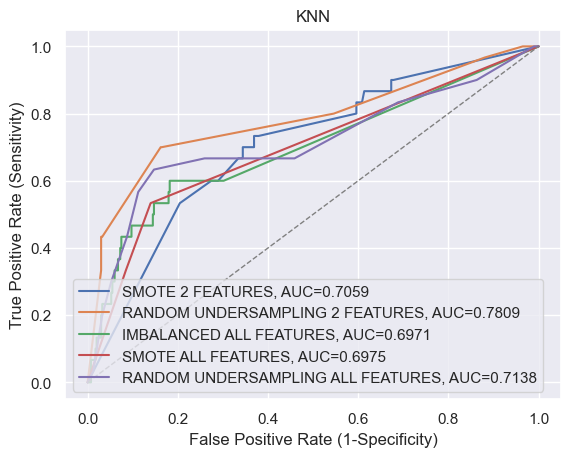

In [164]:
plt.figure(0).clf()

# KNN SMOTE FS
y_pred = best_knn_fs_sm.predict_proba(X_test_fs)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
auc = round(metrics.roc_auc_score(y_test, y_pred), 4)
plt.plot(fpr,tpr,label="SMOTE 2 FEATURES, AUC="+str(auc))

#KNN FS UNDERSAMPLING
y_pred = best_knn_fs_under.predict_proba(X_test_fs)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
auc = round(metrics.roc_auc_score(y_test, y_pred), 4)
plt.plot(fpr,tpr,label="RANDOM UNDERSAMPLING 2 FEATURES, AUC="+str(auc))

# KNN on imbalanced data
y_pred = best_knn_im.predict_proba(X_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
auc = round(metrics.roc_auc_score(y_test, y_pred), 4)
plt.plot(fpr,tpr,label="IMBALANCED ALL FEATURES, AUC="+str(auc))

# KNN SMOTE ALL FEATURES
y_pred = best_knn_sm.predict_proba(X_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
auc = round(metrics.roc_auc_score(y_test, y_pred), 4)
plt.plot(fpr,tpr,label="SMOTE ALL FEATURES, AUC="+str(auc))

# KNN FS UNDERSAMPLING ALL FEATURES
y_pred = best_knn_under.predict_proba(X_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
auc = round(metrics.roc_auc_score(y_test, y_pred), 4)
plt.plot(fpr,tpr,label="RANDOM UNDERSAMPLING ALL FEATURES, AUC="+str(auc))

plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')

plt.title('KNN')
plt.legend()
plt.ylabel('True Positive Rate (Sensitivity)')
plt.xlabel('False Positive Rate (1-Specificity)')
plt.savefig('KNN ROC', bbox_inches='tight')
plt.show()

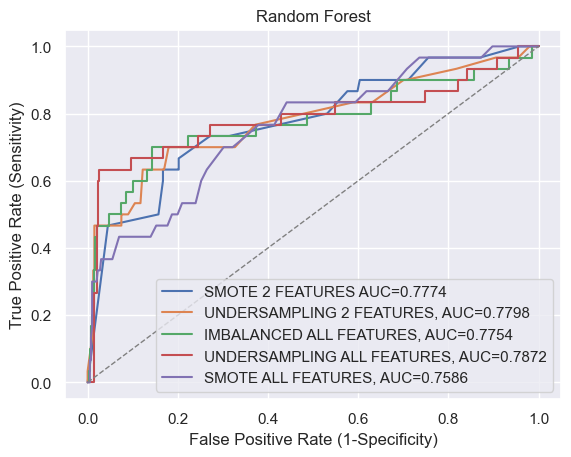

In [89]:
plt.figure(0).clf()
# Random Forest smote
y_pred = best_rfc_sm_fs.predict_proba(X_test_fs)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
auc = round(metrics.roc_auc_score(y_test, y_pred), 4)
plt.plot(fpr,tpr,label="SMOTE 2 FEATURES AUC="+str(auc))

#Random Forest random undersampling
y_pred = best_rfc_under_fs.predict_proba(X_test_fs)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
auc = round(metrics.roc_auc_score(y_test, y_pred), 4)
plt.plot(fpr,tpr,label="UNDERSAMPLING 2 FEATURES, AUC="+str(auc))

# Random forest imbalced data
y_pred = best_rfc_im.predict_proba(X_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
auc = round(metrics.roc_auc_score(y_test, y_pred), 4)
plt.plot(fpr,tpr,label="IMBALANCED ALL FEATURES, AUC="+str(auc))


#Random Forest random undersampling ALL FEATURES
y_pred = best_rfc_under.predict_proba(X_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
auc = round(metrics.roc_auc_score(y_test, y_pred), 4)
plt.plot(fpr,tpr,label="UNDERSAMPLING ALL FEATURES, AUC="+str(auc))

# Random Forest smote ALL FEATURES
y_pred = best_rfc_sm.predict_proba(X_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
auc = round(metrics.roc_auc_score(y_test, y_pred), 4)
plt.plot(fpr,tpr,label="SMOTE ALL FEATURES, AUC="+str(auc))

plt.title('Random Forest')
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.xlabel('False Positive Rate (1-Specificity)')
plt.legend()
plt.savefig('RF ROC', bbox_inches='tight')
plt.show()

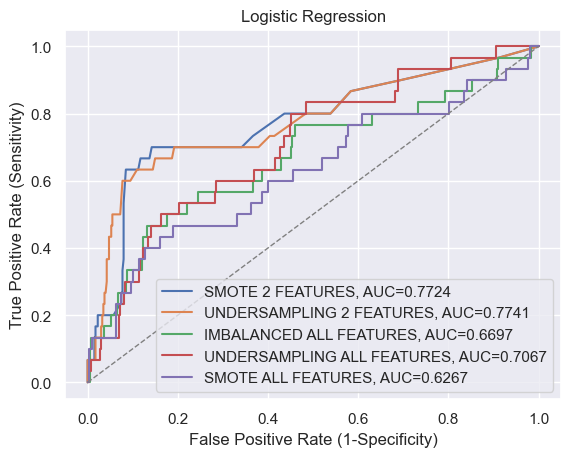

In [163]:
plt.figure(0).clf()
# Logistic regression SMOTE
y_pred = best_lr_sm_fs.predict_proba(X_test_fs)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
auc = round(metrics.roc_auc_score(y_test, y_pred), 4)
plt.plot(fpr,tpr,label="SMOTE 2 FEATURES, AUC="+str(auc))

#logistic regression undersampling
y_pred = best_lr_under_fs.predict_proba(X_test_fs)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
auc = round(metrics.roc_auc_score(y_test, y_pred), 4)
plt.plot(fpr,tpr,label="UNDERSAMPLING 2 FEATURES, AUC="+str(auc))

# Logistic regression imbalanced data
y_pred = best_lr_im.predict_proba(X_test)[:, 1]
fpr, tpr, _= metrics.roc_curve(y_test, y_pred)
auc = round(metrics.roc_auc_score(y_test, y_pred), 4)
plt.plot(fpr,tpr,label="IMBALANCED ALL FEATURES, AUC="+str(auc))

# random undersampling logistic regression all feature
y_pred = best_lr_under.predict_proba(X_test)[:, 1]
fpr, tpr, _= metrics.roc_curve(y_test, y_pred)
auc = round(metrics.roc_auc_score(y_test, y_pred), 4)
plt.plot(fpr,tpr,label="UNDERSAMPLING ALL FEATURES, AUC="+str(auc))

#logistic regression all smaples SMOTE
y_pred = best_lr_sm.predict_proba(X_test)[:, 1]
fpr, tpr, _= metrics.roc_curve(y_test, y_pred)
auc = round(metrics.roc_auc_score(y_test, y_pred), 4)
plt.plot(fpr,tpr,label="SMOTE ALL FEATURES, AUC="+str(auc))

plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')

plt.title('Logistic Regression')
plt.legend(loc='lower right')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.xlabel('False Positive Rate (1-Specificity)')
plt.savefig('LR ROC', bbox_inches='tight')
plt.show()

### PCA on Scaled and (SMOTE) Balanced Data

In [ ]:
# https://www.jcchouinard.com/python-pca-biplots-machine-learning/   code adapted from 
# https://medium.com/data-science-365/principal-component-analysis-pca-with-scikit-learn-1e84a0c731b0
# https://towardsdatascience.com/how-to-select-the-best-number-of-principal-components-for-the-dataset-287e64b14c6d

from sklearn.decomposition import PCA 

pca = PCA(n_components=14, random_state=42)
principal_components_SB= pca.fit_transform(X_sm)
pca_SB_df = pd.DataFrame(data = principal_components_SB, columns = ['PC 1', 'PC 2', 'PC 3', 'PC 4', 'PC 5', 'PC 6','PC 7',
                                                                    'PC 8', 'PC 9', 'PC 10', 'PC 11', 'PC 12', 'PC 13',
                                                                   'PC 14'])
print(pca_SB_df)

print ("Proportion of Variance Explained : ", pca.explained_variance_ratio_)  

# as we have used 14 PC variance should be 100% (1.)
cummalative = np.cumsum(pca.explained_variance_ratio_)  
print ("\nCumulative Proportion of Variance Explained: ", cummalative)

labels=['1','2','3','4','5','6','7','8','9','10','11','12','13','14','15']
plt.figure(figsize=(6,4))
plt.plot(cummalative)
plt.xlabel("Number of PC's")
plt.ylabel('Explained Variance (%)')
plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14], labels)
plt.show()

#the first 5 component explain 71% of the data's varianc

pca = PCA(n_components=3, random_state=42)
principal_components_SB= pca.fit_transform(X_sm)

# creating a loadings table
# https://www.jcchouinard.com/python-pca-biplots-machine-learning/
# https://www.jcchouinard.com/python-pca-biplots-machine-learning/
# https://medium.com/data-science-365/principal-component-analysis-pca-with-scikit-learn-1e84a0c731b0

loadings_SB = pca.components_
 
# Number of features before PCA
n_features_SB = pca.n_features_in_
 
# Feature names before PCA
feature_names_SB = X.columns
 
# PC names
pc_name_SB = [f'PC{i}' for i in list(range(1, n_features_SB + 1))]
 
# Match PC names to loadings
pc_loadings_SB = dict(zip(pc_name_SB, loadings_SB))
 
# Matrix of corr coefs between feature names and PCs
loadings_df_SB = pd.DataFrame.from_dict(pc_loadings_SB)
loadings_df_SB['feature_names'] = feature_names_SB
loadings_df_SB = loadings_df_SB.set_index('feature_names')
loadings_df_SB

sns.set()
xs = loadings_df_SB['PC1']
ys = loadings_df_SB['PC2']
plt.figure(figsize=(10, 6)) 
sns.scatterplot(
    x='PC1', 
    y='PC2', 
    data=pca_df_scaled_SB, 
    hue=pca_df_scaled_SB['target'],  # Color based on the target variable
    palette={'Negative': 'greenyellow', 'Positive': 'mediumvioletred'},
    legend=True
)
for i, varnames in enumerate(feature_names_SB):
    plt.scatter(xs[i], ys[i], s=1)
    plt.arrow(
        0, 0, # coordinates of arrow base
        xs[i], # length of the arrow along x
        ys[i], # length of the arrow along y
        color='b', 
        head_width=0.01
        )
    plt.text(xs[i], ys[i], varnames)
plt.title('PCA Biplot for PC1 and PC2')
plt.show()

In [ ]:
#PC2 and PC3
sns.set()
xs = loadings_df_SB['PC2']
ys = loadings_df_SB['PC3']
plt.figure(figsize=(10, 6)) 
sns.scatterplot(
    x='PC2', 
    y='PC3', 
    data=pca_df_scaled_SB, 
    hue=pca_df_scaled_SB['target'],  # Color based on the target variable
    palette={'Negative': 'greenyellow', 'Positive': 'mediumvioletred'},
    legend=True
)
for i, varnames in enumerate(feature_names_SB):
    plt.scatter(xs[i], ys[i], s=1)
    plt.arrow(
        0, 0, # coordinates of arrow base
        xs[i], # length of the arrow along x
        ys[i], # length of the arrow along y
        color='b', 
        head_width=0.01
        )
    plt.text(xs[i], ys[i], varnames)
plt.title('PCA Biplot for PC1 and PC2')
plt.show()